In [106]:
from urllib.request import Request, urlopen 
from urllib.parse import urlencode, quote_plus
import pandas as pd 
from pandas.io.json import json_normalize 
import json
import requests
from bs4 import BeautifulSoup
import urllib
import re
import requests

import math

# 중국 관광객

In [10]:
serviceKey = 'trrpbpt3b_9e22j32pc9prcb2t9e39c2' # 공공데이터포털에서 발급받은 서비스키 입력

# 서비스URL

sd="201701"
ed="201801"


se_date=["201701",
         "201702",
         "201703",
         "201704",
         "201705",
         "201706",
         "201707",
         "201708",
         "201709",
         "201710",
         "201711",
         "201712",
         "201801"]
num=1
url = f"https://open.jejudatahub.net/api/proxy/tt1tDtaa0at16Daa0D60D06tDD0166t1/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
response = urlopen(url)
json_api = response.read().decode("utf-8")
json_file = json.loads(json_api)
json_file
chi=json_normalize(json_file['data'])

for num in range(2,35) :
    url = f"https://open.jejudatahub.net/api/proxy/tt1tDtaa0at16Daa0D60D06tDD0166t1/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
    response = urlopen(url)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    tmp_chi=json_normalize(json_file['data'])
    chi=pd.concat([chi,tmp_chi])

<ipython-input-10-4d609a4eeea3>:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  chi=json_normalize(json_file['data'])
<ipython-input-10-4d609a4eeea3>:40: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tmp_chi=json_normalize(json_file['data'])


In [11]:
json_file

{'totCnt': 346, 'hasMore': False, 'data': []}

In [12]:
chi

,sido,sigungu,cityGubun,marketType,dtYearMonth,userCount,useCount,useCost
0,제주도,제주시,읍면,식음료,201801,120,135,3419300
1,제주도,제주시,읍면,숙박,201801,28,61,1310341692
2,제주도,제주시,읍면,쇼핑,201801,44,103,2270090
3,제주도,제주시,읍면,소매,201801,12,19,1557250
4,제주도,제주시,읍면,문화/레져,201801,37,42,28073006
...,...,...,...,...,...,...,...,...
41,제주도,서귀포시,도심,숙박,201701,318,380,177035129
42,제주도,서귀포시,도심,쇼핑,201701,2889,4342,308558320
43,제주도,서귀포시,도심,소매,201701,867,1096,134085100
44,제주도,서귀포시,도심,문화/레져,201701,2942,3226,170072770


In [14]:
city=["읍면","도심"]
market=["교통", "기타", "소매", "쇼핑", "숙박", "유흥", "전체", "문화/레져", "식음료"]
se_date=["201701",
         "201702",
         "201703",
         "201704",
         "201705",
         "201706",
         "201707",
         "201708",
         "201709",
         "201710",
         "201711",
         "201712",
         "201801"]

In [92]:
tmp = chi[chi["cityGubun"]=="읍면"]

In [93]:
tmp2 = tmp[tmp["marketType"]=="유흥"]

In [94]:
tmp2[tmp2["dtYearMonth"]=="201702"].sum().useCost

0.0

In [113]:
i=0
for p1 in city :
    tmp = chi[chi["cityGubun"]==p1]
    for p2 in market :
        tmp2 = tmp[tmp["marketType"]==p2]
        i+=1
        globals()[f'd{i}']=[]
        print(p1,p2,i)
        for p3 in se_date :
            try :
                globals()[f'd{i}'].append([
                p3,
                math.trunc(tmp2[tmp2["dtYearMonth"]==p3].sum().userCount),
                math.trunc(tmp2[tmp2["dtYearMonth"]==p3].sum().useCount),
                math.trunc(tmp2[tmp2["dtYearMonth"]==p3].sum().useCost)])
            except :
                globals()[f'd{i}'].append([
                p3,
                tmp2[tmp2["dtYearMonth"]==p3].sum().userCount,
                tmp2[tmp2["dtYearMonth"]==p3].sum().useCount,
                tmp2[tmp2["dtYearMonth"]==p3].sum().useCost])
            
            
            
            
print(i)

읍면 교통 1
읍면 기타 2
읍면 소매 3
읍면 쇼핑 4
읍면 숙박 5
읍면 유흥 6
읍면 전체 7
읍면 문화/레져 8
읍면 식음료 9
도심 교통 10
도심 기타 11
도심 소매 12
도심 쇼핑 13
도심 숙박 14
도심 유흥 15
도심 전체 16
도심 문화/레져 17
도심 식음료 18
18


In [114]:
col_name = ['날짜',"이용자수","이용횟수","이용금액"]

In [115]:
for i in range(1,19) :
    globals()[f'df{i}'] = pd.DataFrame(globals()[f'd{i}'], columns=col_name)

In [116]:
for i in range(1,19) :
    print(globals()[f'df{i}'],"-------------",i) #확인

        날짜  이용자수  이용횟수     이용금액
0   201701    75    81  1557400
1   201702    58    61   851300
2   201703    52    59  1300100
3   201704    41    41   833700
4   201705    27    29   634700
5   201706    31    33   466400
6   201707    44    47   918400
7   201708    73    78  1908200
8   201709    50    55  1401900
9   201710    61    68  1694000
10  201711    28    29   606800
11  201712    26    30  1153400
12  201801    32    34  1582200 ------------- 1
        날짜  이용자수  이용횟수      이용금액
0   201701    92    98  17252520
1   201702   111   119  24076320
2   201703    36    40  13636000
3   201704    11    11    388000
4   201705     6     6    199000
5   201706    14    19   1154121
6   201707    18    23   1306866
7   201708    31    32  32067318
8   201709    25    26   8259718
9   201710    27    27   3778842
10  201711     5     5   3142500
11  201712     0     0         0
12  201801     0     0         0 ------------- 2
        날짜   이용자수   이용횟수        이용금액
0   201701  12199  14

In [117]:
# 6,7,16 결측
df11

,날짜,이용자수,이용횟수,이용금액
0,201701,3425,3789,1340276316
1,201702,3168,3545,2742319820
2,201703,1441,1608,413474819
3,201704,586,660,141817125
4,201705,619,727,120135659
5,201706,665,744,145631920
6,201707,915,1074,346158743
7,201708,771,902,235382901
8,201709,841,1019,319850242
9,201710,982,1193,413792109


# 국내

In [118]:
from urllib.parse import quote # 유니코드 인코딩

In [121]:
serviceKey = 'trrpbpt3b_9e22j32pc9prcb2t9e39c2' # 공공데이터포털에서 발급받은 서비스키 입력

sd="201701"
ed="201801"
query = quote('내국인관광객')
num=1
url = f"https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&userType={query}&number={num}"
response = urlopen(url)
json_api = response.read().decode("utf-8")
json_file = json.loads(json_api)
json_file
kor=json_normalize(json_file['data'])

# for i in se_date :
for num in range(2,48) :
    url = f"https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&userType={query}&number={num}"
    response = urlopen(url)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    json_file
    tmp_kor=json_normalize(json_file['data'])
    kor=pd.concat([kor,tmp_kor])

<ipython-input-121-109994f7711c>:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  kor=json_normalize(json_file['data'])
<ipython-input-121-109994f7711c>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tmp_kor=json_normalize(json_file['data'])


In [122]:
kor

,sido,sigungu,cityGubun,marketType,userType,ageGroup,gender,dtYearMonth,userCount,useCount,useCost
0,제주도,제주시,읍면,유흥,내국인관광객,60대이상,여,201801,23,49,5487000
1,제주도,제주시,읍면,유흥,내국인관광객,60대이상,남,201801,43,60,7575000
2,제주도,제주시,읍면,유흥,내국인관광객,50대,여,201801,39,46,3388900
3,제주도,제주시,읍면,유흥,내국인관광객,50대,남,201801,129,207,34239700
4,제주도,제주시,읍면,유흥,내국인관광객,40대,여,201801,61,69,3454000
...,...,...,...,...,...,...,...,...,...,...,...
93,제주도,서귀포시,도심,교통,내국인관광객,40대,남,201701,1891,2241,101651320
94,제주도,서귀포시,도심,교통,내국인관광객,30대,여,201701,1033,1138,36637253
95,제주도,서귀포시,도심,교통,내국인관광객,30대,남,201701,1570,1922,85201203
96,제주도,서귀포시,도심,교통,내국인관광객,20대,여,201701,593,631,18802900


In [123]:
i=0
for p1 in city :
    tmp = kor[kor["cityGubun"]==p1]
    for p2 in market :
        tmp2 = tmp[tmp["marketType"]==p2]
        i+=1
        globals()[f'dk{i}']=[]
        print(p1,p2,i)
        for p3 in se_date :
            try :
                globals()[f'dk{i}'].append([
                p3,
                math.trunc(tmp2[tmp2["dtYearMonth"]==p3].sum().userCount),
                math.trunc(tmp2[tmp2["dtYearMonth"]==p3].sum().useCount),
                math.trunc(tmp2[tmp2["dtYearMonth"]==p3].sum().useCost)])
            except :
                globals()[f'dk{i}'].append([
                p3,
                tmp2[tmp2["dtYearMonth"]==p3].sum().userCount,
                tmp2[tmp2["dtYearMonth"]==p3].sum().useCount,
                tmp2[tmp2["dtYearMonth"]==p3].sum().useCost])
            
            
            
            
print(i)

읍면 교통 1
읍면 기타 2
읍면 소매 3
읍면 쇼핑 4
읍면 숙박 5
읍면 유흥 6
읍면 전체 7
읍면 문화/레져 8
읍면 식음료 9
도심 교통 10
도심 기타 11
도심 소매 12
도심 쇼핑 13
도심 숙박 14
도심 유흥 15
도심 전체 16
도심 문화/레져 17
도심 식음료 18
18


In [127]:
for i in range(1,19) :
    globals()[f'dfk{i}'] = pd.DataFrame(globals()[f'dk{i}'], columns=col_name)

In [130]:
for i in range(1,19) :
    print(globals()[f'dfk{i}'],"-------------",i) #확인

        날짜   이용자수   이용횟수        이용금액
0   201701  30216  36312  1877570840
1   201702  28061  33300  1635103400
2   201703  31954  38202  1733749839
3   201704  35022  41130  1753460382
4   201705  39049  45131  1812073384
5   201706  36573  42485  1663733827
6   201707  40635  47517  1786945394
7   201708  46200  54143  2078549544
8   201709  37477  44110  1730425397
9   201710  33797  39468  1704771390
10  201711  29297  35296  1576278722
11  201712  28100  34001  1623029731
12  201801  28652  34672  1685640390 ------------- 1
        날짜   이용자수   이용횟수       이용금액
0   201701  10511  15783  648034767
1   201702  10277  15093  606843651
2   201703  11914  18146  689696596
3   201704  13546  19631  738592037
4   201705  15913  22977  813555936
5   201706  15288  22033  812799666
6   201707  16251  22856  815205557
7   201708  19688  27489  962940288
8   201709  17097  24812  862427885
9   201710  14346  20374  779130055
10  201711  13285  20246  798126309
11  201712      0      0          

In [132]:
#16,7 결측

In [133]:
#6,7,16 종합결측

In [135]:
#11,12월 결측행 존재

# 중국 업종별 카드

In [141]:
serviceKey = 'trrpbpt3b_9e22j32pc9prcb2t9e39c2' # 공공데이터포털에서 발급받은 서비스키 입력



sd="201701"
ed="201711"

num=1
url = f"https://open.jejudatahub.net/api/proxy/b6000b0ta01tDDaat00btaaat1Dtb101/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
response = urlopen(url)
json_api = response.read().decode("utf-8")
json_file = json.loads(json_api)
json_file
chi_c=json_normalize(json_file['data'])

# for i in se_date :
for num in range(2,48) :
    url = f"https://open.jejudatahub.net/api/proxy/b6000b0ta01tDDaat00btaaat1Dtb101/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
    response = urlopen(url)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    json_file
    tmp_chi_c=json_normalize(json_file['data'])
    chi_c=pd.concat([chi_c,tmp_chi_c])

<ipython-input-141-519aaff9afdd>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  chi_c=json_normalize(json_file['data'])
<ipython-input-141-519aaff9afdd>:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tmp_chi_c=json_normalize(json_file['data'])


In [143]:
json_file

{'totCnt': 44, 'hasMore': False, 'data': []}

In [148]:
se_date2=["201701",
         "201702",
         "201703",
         "201704",
         "201705",
         "201706",
         "201707",
         "201708",
         "201709",
         "201710",
          "201711"
        ] #1~11월까지 데이터존재
market2=["렌 트 카", "면 세 점", "특급 호텔", "여관/기타숙박업"]

In [181]:
i=0
for p2 in market2 :
    i+=1
    globals()[f'dfcc{i}'] = chi_c[chi_c["marketType"]==p2]
    print(p2,i)
            
print(i)

렌 트 카 1
면 세 점 2
특급 호텔 3
여관/기타숙박업 4
4


In [182]:
dfcc4

,marketType,dtYearMonth,costOfPerson,eventSum
1,여관/기타숙박업,201711,413735,349128
5,여관/기타숙박업,201710,338769,279955
9,여관/기타숙박업,201709,789044,706413
13,여관/기타숙박업,201708,456619,397527
17,여관/기타숙박업,201707,533613,463697
21,여관/기타숙박업,201706,571931,529249
25,여관/기타숙박업,201705,308093,277213
29,여관/기타숙박업,201704,334849,297923
33,여관/기타숙박업,201703,301629,267753
37,여관/기타숙박업,201702,262934,231207


# 한국 업종별 카드

In [145]:
serviceKey = 'trrpbpt3b_9e22j32pc9prcb2t9e39c2' # 공공데이터포털에서 발급받은 서비스키 입력



sd="201701"
ed="201711"

num=1
url = f"https://open.jejudatahub.net/api/proxy/aDt9Dtat11DatDttataD88tata98D9tD/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
response = urlopen(url)
json_api = response.read().decode("utf-8")
json_file = json.loads(json_api)
json_file
kor_c=json_normalize(json_file['data'])

# for i in se_date :
for num in range(2,48) :
    url = f"https://open.jejudatahub.net/api/proxy/aDt9Dtat11DatDttataD88tata98D9tD/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
    response = urlopen(url)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    json_file
    tmp_kor_c=json_normalize(json_file['data'])
    kor_c=pd.concat([kor_c,tmp_kor_c])

<ipython-input-145-d84df90956cc>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  kor_c=json_normalize(json_file['data'])
<ipython-input-145-d84df90956cc>:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tmp_kor_c=json_normalize(json_file['data'])


In [185]:
json_file

{'totCnt': 44, 'hasMore': False, 'data': []}

In [183]:
i=0
for p2 in market2 :
    i+=1
    globals()[f'dfkc{i}'] = kor_c[kor_c["marketType"]==p2]
    print(p2,i)
            
print(i)

렌 트 카 1
면 세 점 2
특급 호텔 3
여관/기타숙박업 4
4


In [147]:
#인당이용금액,건당이용금액

In [184]:
dfkc1

,marketType,dtYearMonth,costOfPerson,eventSum
3,렌 트 카,201711,73674,64763
7,렌 트 카,201710,104455,91590
11,렌 트 카,201709,88097,78241
15,렌 트 카,201708,122097,109197
19,렌 트 카,201707,108483,97304
23,렌 트 카,201706,84310,74832
27,렌 트 카,201705,96454,85242
31,렌 트 카,201704,89240,78944
35,렌 트 카,201703,73089,64526
39,렌 트 카,201702,77505,68319


# 요일별

In [193]:
serviceKey = 'trrpbpt3b_9e22j32pc9prcb2t9e39c2' # 공공데이터포털에서 발급받은 서비스키 입력



sd="201701"
ed="201711"

num=1
url = f"https://open.jejudatahub.net/api/proxy/868ttD1tbDb8tbt00tDtaba6t0Db1110/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
response = urlopen(url)
json_api = response.read().decode("utf-8")
json_file = json.loads(json_api)
json_file
ddate=json_normalize(json_file['data'])

# for i in se_date :
for num in range(2,48) :
    url = f"https://open.jejudatahub.net/api/proxy/868ttD1tbDb8tbt00tDtaba6t0Db1110/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
    response = urlopen(url)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    json_file
    tmp_ddate=json_normalize(json_file['data'])
    ddate=pd.concat([ddate,tmp_ddate])

<ipython-input-193-bc87cf45fc21>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  ddate=json_normalize(json_file['data'])
<ipython-input-193-bc87cf45fc21>:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tmp_ddate=json_normalize(json_file['data'])


In [194]:
json_file

{'totCnt': 770, 'hasMore': False, 'data': []}

In [187]:
ddate

,districtType,userType,dtYearMonth,dtWeek,userCount,useCount,useCost
0,중국인 주요 관광지,중국인관광객,201711,화,2020,5044,1072164080
1,중국인 주요 관광지,중국인관광객,201711,토,2343,6024,1293543967
2,중국인 주요 관광지,중국인관광객,201711,일,2300,5755,1140826718
3,중국인 주요 관광지,중국인관광객,201711,월,1988,4873,862015624
4,중국인 주요 관광지,중국인관광객,201711,수,2641,6848,1568718549
...,...,...,...,...,...,...,...
65,내국인 주요 관광지,내국인관광객,201701,일,36016,65938,2885083126
66,내국인 주요 관광지,내국인관광객,201701,월,31521,57311,2387177566
67,내국인 주요 관광지,내국인관광객,201701,수,24868,44607,1678593699
68,내국인 주요 관광지,내국인관광객,201701,목,24604,43714,1677157194


In [ ]:
ddate[ddate["districtType"]=="중국인주요관광지"].sum().useCost

In [265]:
tmp1=ddate[ddate["districtType"]=="중국인 주요 관광지"]

In [266]:
tmp1[tmp1["userType"]=="중국인관광객"]

,districtType,userType,dtYearMonth,dtWeek,userCount,useCount,useCost
0,중국인 주요 관광지,중국인관광객,201711,화,2020,5044,1072164080
1,중국인 주요 관광지,중국인관광객,201711,토,2343,6024,1293543967
2,중국인 주요 관광지,중국인관광객,201711,일,2300,5755,1140826718
3,중국인 주요 관광지,중국인관광객,201711,월,1988,4873,862015624
4,중국인 주요 관광지,중국인관광객,201711,수,2641,6848,1568718549
...,...,...,...,...,...,...,...
2,중국인 주요 관광지,중국인관광객,201701,일,14870,35944,5640807599
3,중국인 주요 관광지,중국인관광객,201701,월,11729,28235,4552142061
4,중국인 주요 관광지,중국인관광객,201701,수,14387,36277,5318511835
5,중국인 주요 관광지,중국인관광객,201701,목,10133,23854,3805210463


In [280]:
day=["월","화","수","목","금","토","일"]

In [345]:
ddate[(ddate["districtType"]=="중국인 주요 관광지") & ~(ddate["userType"]!="중국인관광객")&~(ddate["dtWeek"]!="월")].sum().useCost

19453430705

In [284]:
dc1=[]
for param in day :
    dc1.append(ddate[(ddate["districtType"]=="중국인 주요 관광지") 
                     & ~(ddate["userType"]!="중국인관광객")&~(ddate["dtWeek"]!=f"{param}")].sum().useCost)

In [285]:
dc2=[]
for param in day :
    dc2.append(ddate[(ddate["districtType"]=="중국인 주요 관광지") 
                     & ~(ddate["userType"]!="내국인관광객")&~(ddate["dtWeek"]!=f"{param}")].sum().useCost)

In [286]:
dc3=[]
for param in day :
    dc3.append(ddate[(ddate["districtType"]=="내국인 주요 관광지") 
                     & ~(ddate["userType"]!="내국인관광객")&~(ddate["dtWeek"]!=f"{param}")].sum().useCost)

In [287]:
dc4=[]
for param in day :
    dc4.append(ddate[(ddate["districtType"]=="내국인 주요 관광지") 
                     & ~(ddate["userType"]!="중국인관광객")&~(ddate["dtWeek"]!=f"{param}")].sum().useCost)

In [188]:
#요일별 중국인관광객/내국인관광객 #내국인주요관광지 중국인 주요관광지

# 업종별

In [189]:
serviceKey = 'trrpbpt3b_9e22j32pc9prcb2t9e39c2' # 공공데이터포털에서 발급받은 서비스키 입력



sd="201701"
ed="201711"

num=1
url = f"https://open.jejudatahub.net/api/proxy/a0b10aat1ata50aat5tbb1at011D1060/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
response = urlopen(url)
json_api = response.read().decode("utf-8")
json_file = json.loads(json_api)
json_file
dmk=json_normalize(json_file['data'])

# for i in se_date :
for num in range(2,48) :
    url = f"https://open.jejudatahub.net/api/proxy/a0b10aat1ata50aat5tbb1at011D1060/{serviceKey}?startDate={sd}&endDate={ed}&limit=100&number={num}"
    response = urlopen(url)
    json_api = response.read().decode("utf-8")
    json_file = json.loads(json_api)
    json_file
    tmp_dmk=json_normalize(json_file['data'])
    dmk=pd.concat([dmk,tmp_dmk])

<ipython-input-189-e3b46d6ea273>:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dmk=json_normalize(json_file['data'])
<ipython-input-189-e3b46d6ea273>:23: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tmp_dmk=json_normalize(json_file['data'])


In [191]:
json_file

{'totCnt': 692, 'hasMore': False, 'data': []}

In [190]:
dmk

,districtType,marketType,userType,dtYearMonth,userCount,useCount,useCost
0,중국인 주요 관광지,유흥,중국인관광객,201711,55,54,4635900
1,중국인 주요 관광지,유흥,내국인관광객,201711,2751,3711,665995420
2,중국인 주요 관광지,식음료,중국인관광객,201711,1437,1871,75175420
3,중국인 주요 관광지,식음료,내국인관광객,201711,31091,57573,2197894222
4,중국인 주요 관광지,숙박,중국인관광객,201711,309,357,72736538
...,...,...,...,...,...,...,...
87,내국인 주요 관광지,소매,내국인관광객,201701,19045,22880,890199410
88,내국인 주요 관광지,문화/레져,중국인관광객,201701,2738,3056,153098840
89,내국인 주요 관광지,문화/레져,내국인관광객,201701,9503,12235,457706688
90,내국인 주요 관광지,교통,중국인관광객,201701,91,102,4953019


In [346]:
mk2=["교통", "소매", "쇼핑", "숙박", "유흥", "문화/레져", "식음료"]

In [352]:
dmk[(dmk["districtType"]=="중국인 주요 관광지") & ~(dmk["userType"]!="중국인관광객")&~(dmk["marketType"]!="유흥")].sum().useCost

115628840

In [355]:
dd1=[]
for param in mk2 :
    dd1.append(dmk[(dmk["districtType"]=="중국인 주요 관광지")
                   & ~(dmk["userType"]!="중국인관광객")&~(dmk["marketType"]!=f"{param}")].sum().useCost)

In [356]:
dd2=[]
for param in mk2 :
    dd2.append(dmk[(dmk["districtType"]=="중국인 주요 관광지")
                   & ~(dmk["userType"]!="내국인관광객")&~(dmk["marketType"]!=f"{param}")].sum().useCost)

In [357]:
dd3=[]
for param in mk2 :
    dd3.append(dmk[(dmk["districtType"]=="내국인 주요 관광지")
                   & ~(dmk["userType"]!="내국인관광객")&~(dmk["marketType"]!=f"{param}")].sum().useCost)

In [358]:
dd4=[]
for param in mk2 :
    dd4.append(dmk[(dmk["districtType"]=="내국인 주요 관광지")
                   & ~(dmk["userType"]!="중국인관광객")&~(dmk["marketType"]!=f"{param}")].sum().useCost)

# 시각화

In [262]:
#데이터 명세서

# 업종 요금 : 날짜 이용자수  이용횟수      이용금액
# 중국 df1~
# 국내 dfk1~
# # 6,7,16 결측
# 읍면 교통 1
# 읍면 기타 2
# 읍면 소매 3
# 읍면 쇼핑 4
# 읍면 숙박 5
# 읍면 유흥 6 ######
# 읍면 전체 7 ######
# 읍면 문화/레져 8
# 읍면 식음료 9
# 도심 교통 10
# 도심 기타 11
# 도심 소매 12
# 도심 쇼핑 13
# 도심 숙박 14
# 도심 유흥 15
# 도심 전체 16 #######
# 도심 문화/레져 17
# 도심 식음료 18

# 카드 : 날짜 인당이용금액, 건당이용금액
# dtYearMonth	costOfPerson	eventSum
# 렌 트 카 1
# 면 세 점 2
# 특급 호텔 3
# 여관/기타숙박업 4
# 중국 dfcc1~
# 한국 dfkc1~

# 요일별
# dc1 중국관광지 중국인
# dc2 중국관광지 내국인
# dc3 내국관광지 내국인
# dc4 내국관광지 중국인
# 0~6 월~일

# 업종별
# dd1 중국관광지 중국인
# dd2 중국관광지 내국인
# dd3 내국관광지 내국인
# dd4 내국관광지 중국인
# 0 교통
# 1 소매
# 2 쇼핑
# 3 숙박
# 4 유흥
# 5 문화레져
# 6 식음료






In [218]:
import platform

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager

import seaborn as sns

import numpy as np

In [232]:
#읍/면단위

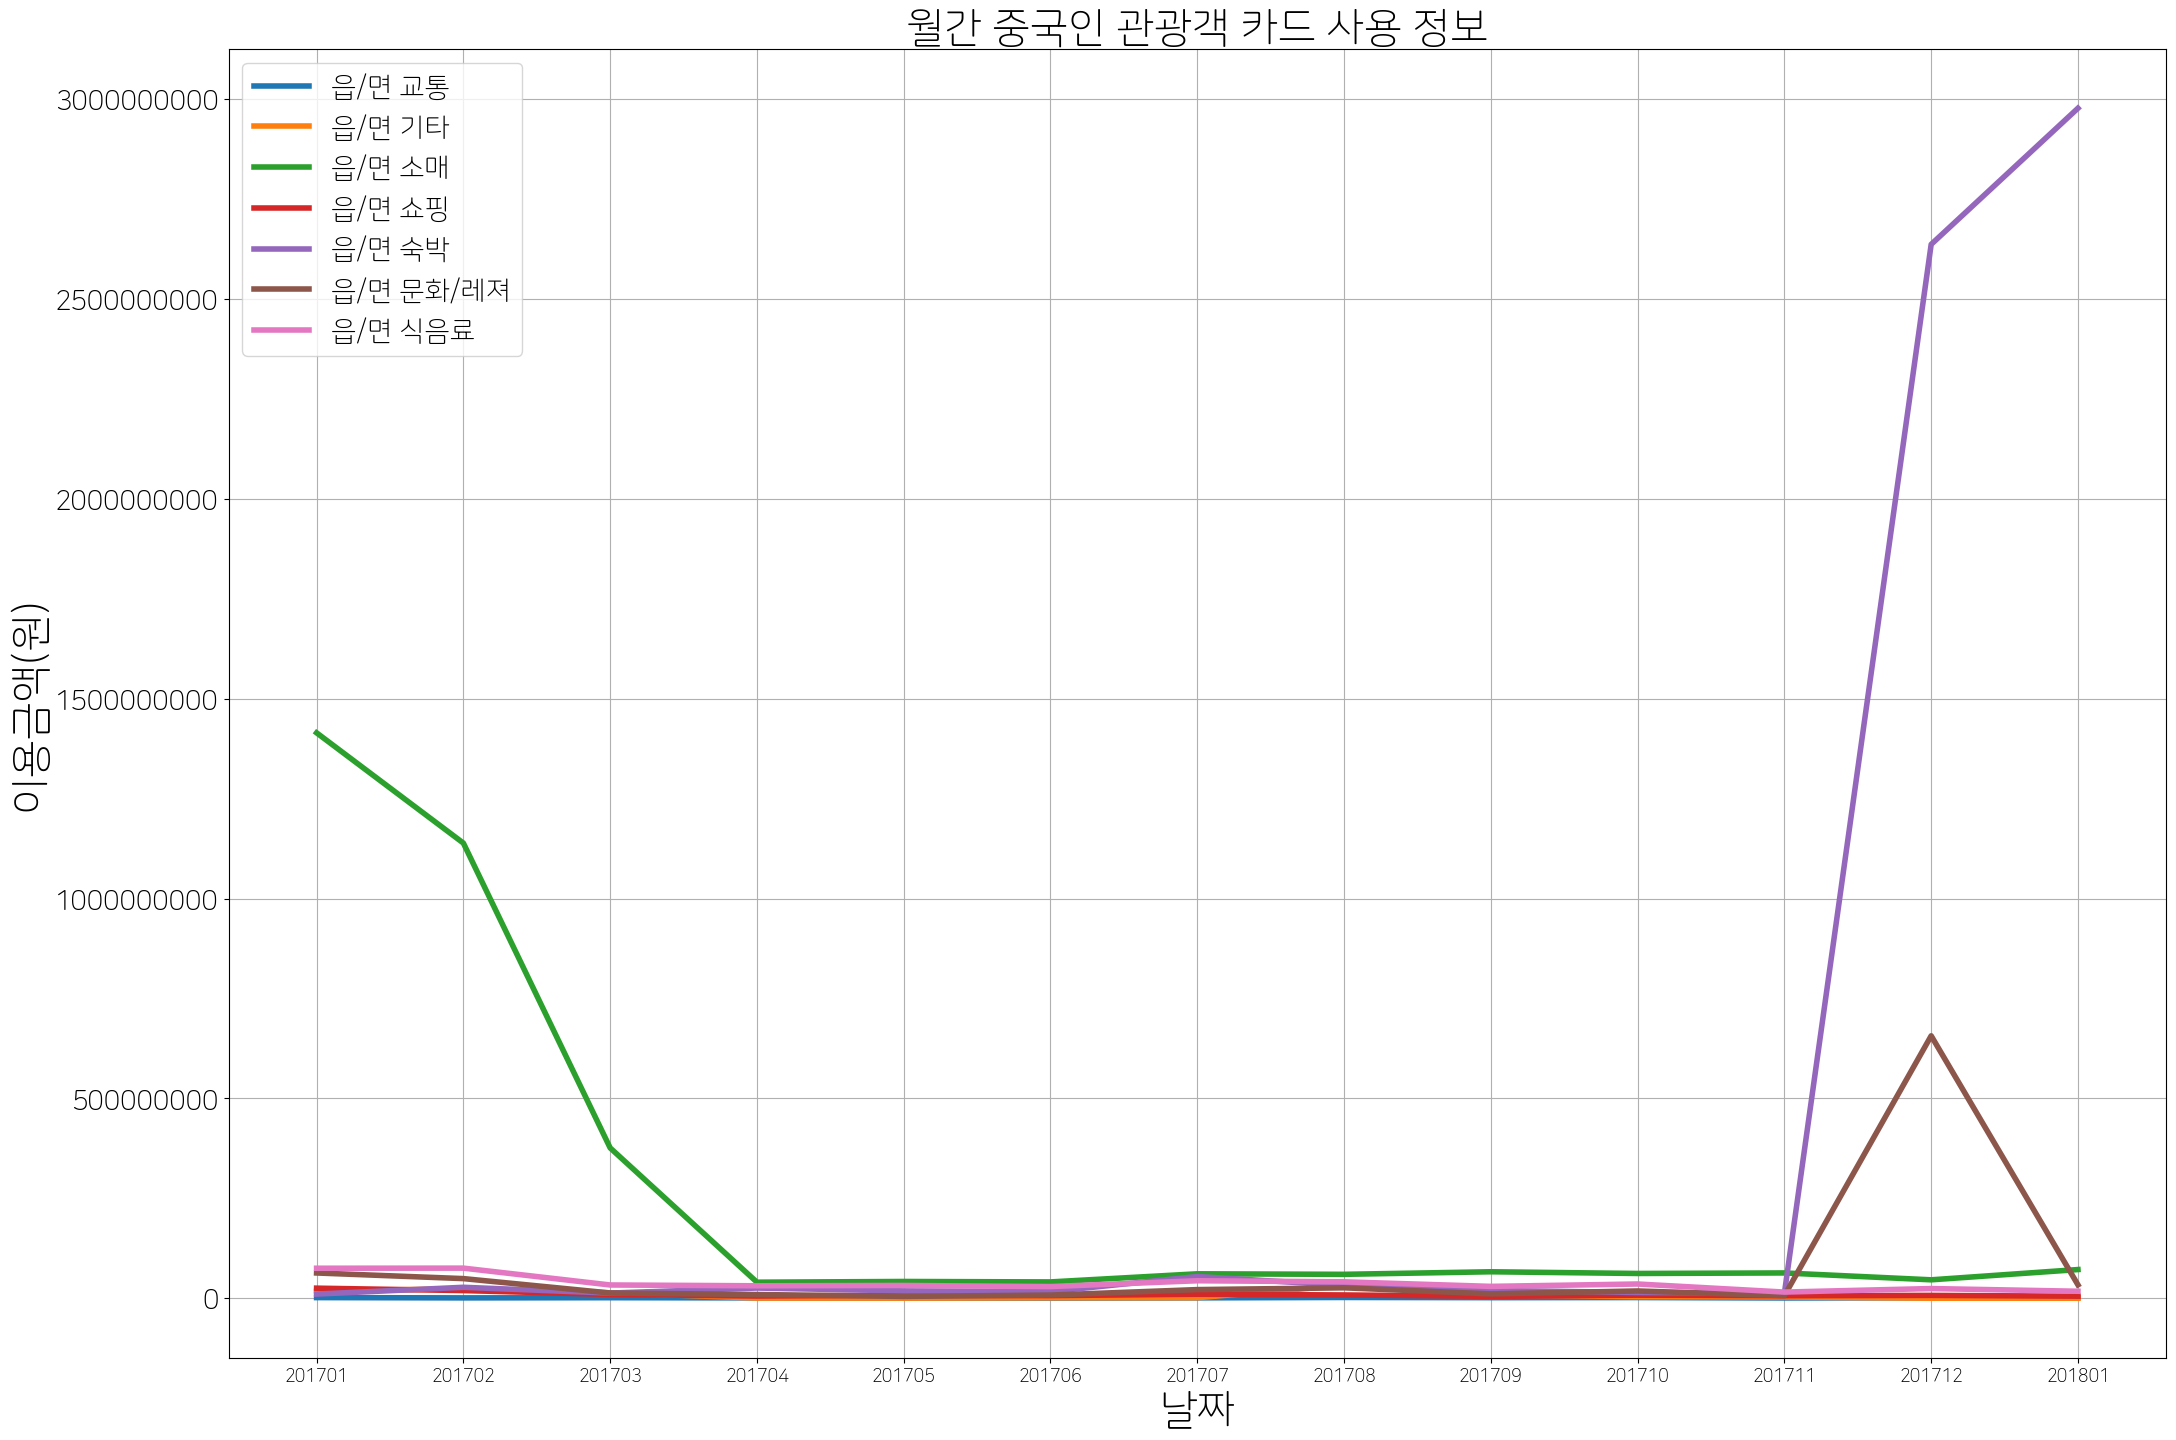

In [247]:
#전체 읍면 단위
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(df1["날짜"], df1["이용금액"], linestyle='-', linewidth=4)
plt.plot(df2["날짜"], df2["이용금액"], linestyle='-', linewidth=4)
plt.plot(df3["날짜"], df3["이용금액"], linestyle='-', linewidth=4)
plt.plot(df4["날짜"], df4["이용금액"], linestyle='-', linewidth=4)
plt.plot(df5["날짜"], df5["이용금액"], linestyle='-', linewidth=4)
plt.plot(df8["날짜"], df8["이용금액"], linestyle='-', linewidth=4)
plt.plot(df9["날짜"], df9["이용금액"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['읍/면 교통','읍/면 기타','읍/면 소매', '읍/면 쇼핑',
            '읍/면 숙박', '읍/면 문화/레져','읍/면 식음료'], fontsize=20)
plt.title('월간 중국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

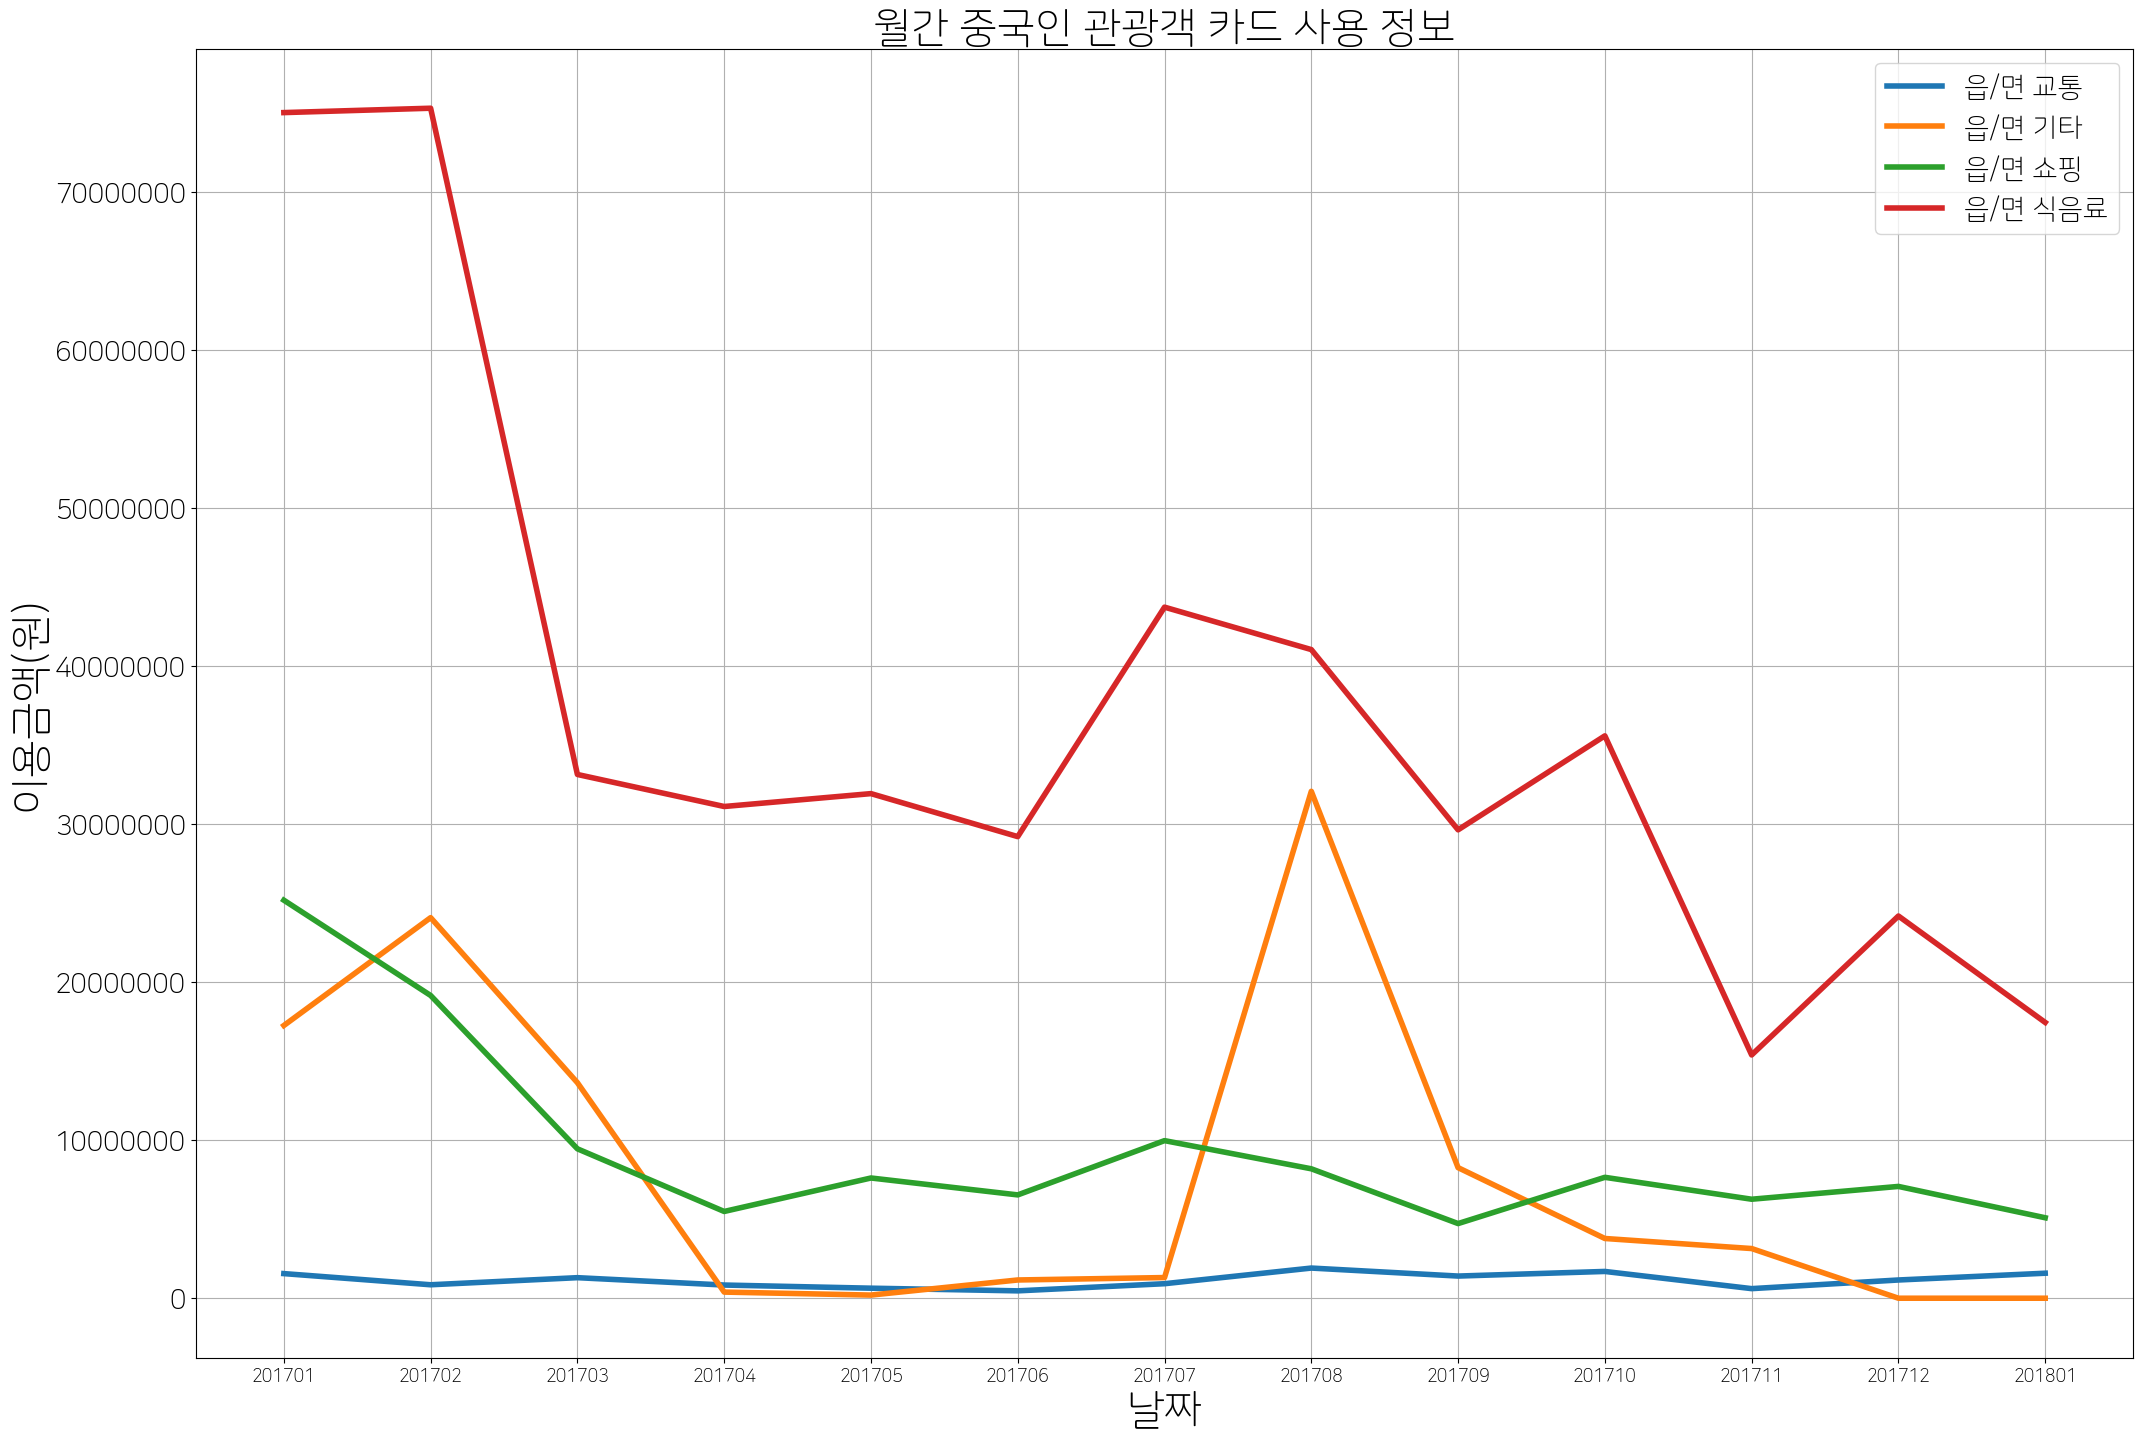

In [248]:
#소매,숙박,문화레저 제거
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(df1["날짜"], df1["이용금액"], linestyle='-', linewidth=4)
plt.plot(df2["날짜"], df2["이용금액"], linestyle='-', linewidth=4)
plt.plot(df4["날짜"], df4["이용금액"], linestyle='-', linewidth=4)
plt.plot(df9["날짜"], df9["이용금액"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['읍/면 교통','읍/면 기타','읍/면 쇼핑','읍/면 식음료'], fontsize=20)
plt.title('월간 중국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

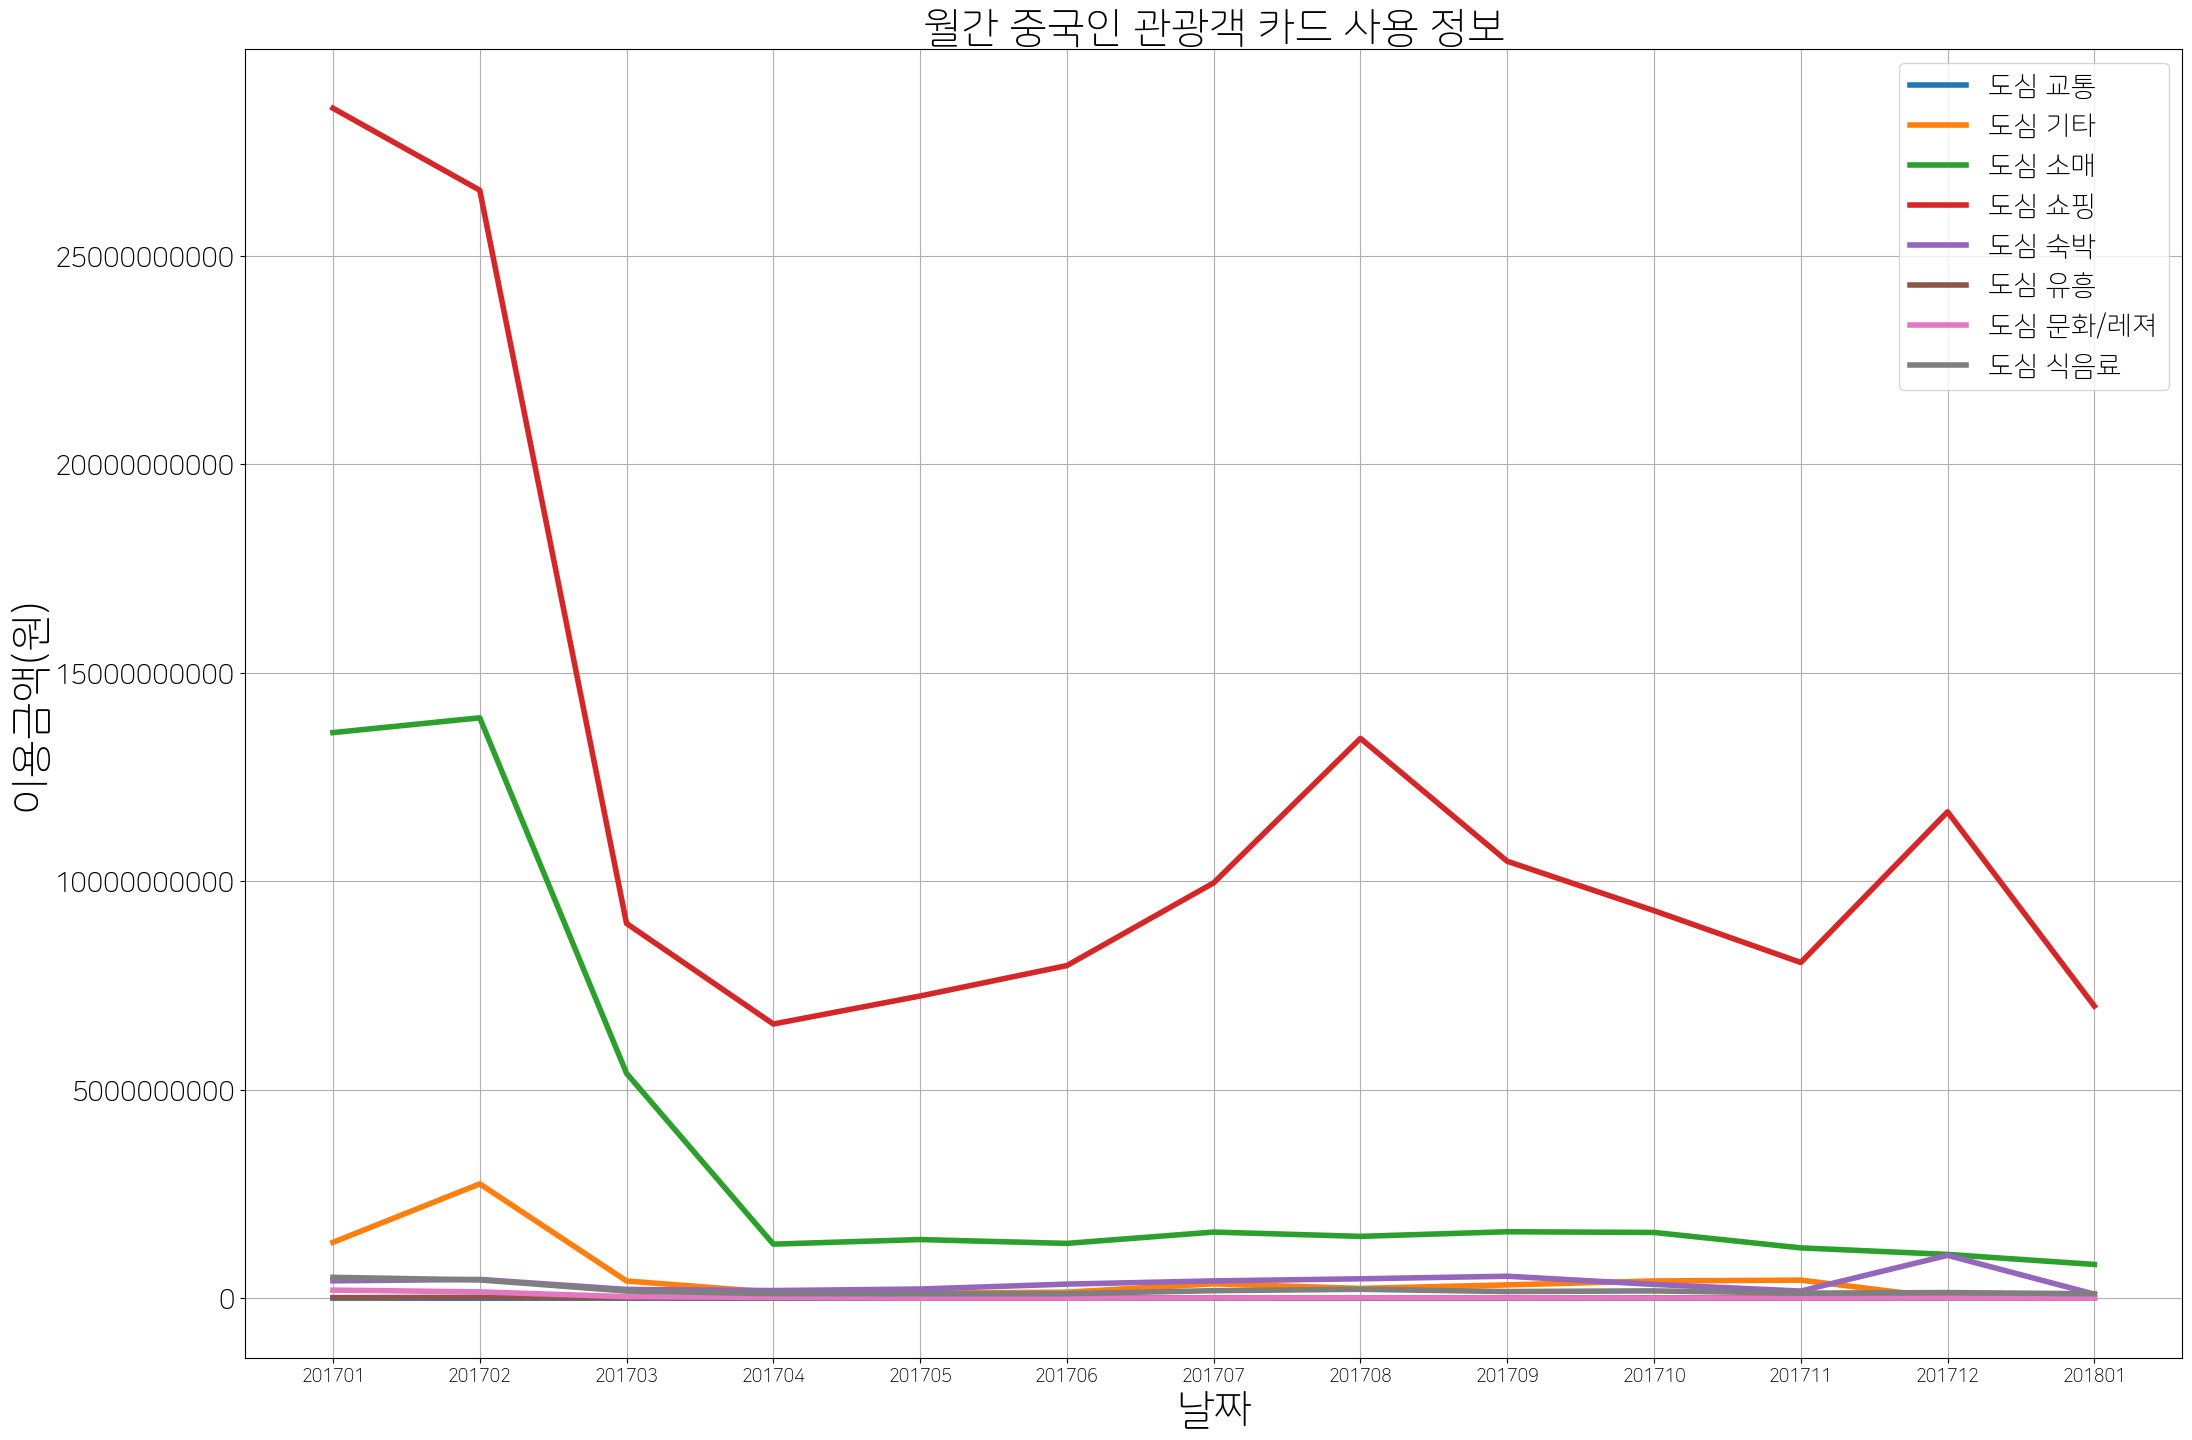

In [249]:
#도심전체
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(df10["날짜"], df10["이용금액"], linestyle='-', linewidth=4)
plt.plot(df11["날짜"], df11["이용금액"], linestyle='-', linewidth=4)
plt.plot(df12["날짜"], df12["이용금액"], linestyle='-', linewidth=4)
plt.plot(df13["날짜"], df13["이용금액"], linestyle='-', linewidth=4)
plt.plot(df14["날짜"], df14["이용금액"], linestyle='-', linewidth=4)
plt.plot(df15["날짜"], df15["이용금액"], linestyle='-', linewidth=4)
plt.plot(df17["날짜"], df17["이용금액"], linestyle='-', linewidth=4)
plt.plot(df18["날짜"], df18["이용금액"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['도심 교통','도심 기타','도심 소매', '도심 쇼핑',
            '도심 숙박','도심 유흥', '도심 문화/레져','도심 식음료'], fontsize=20)
plt.title('월간 중국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

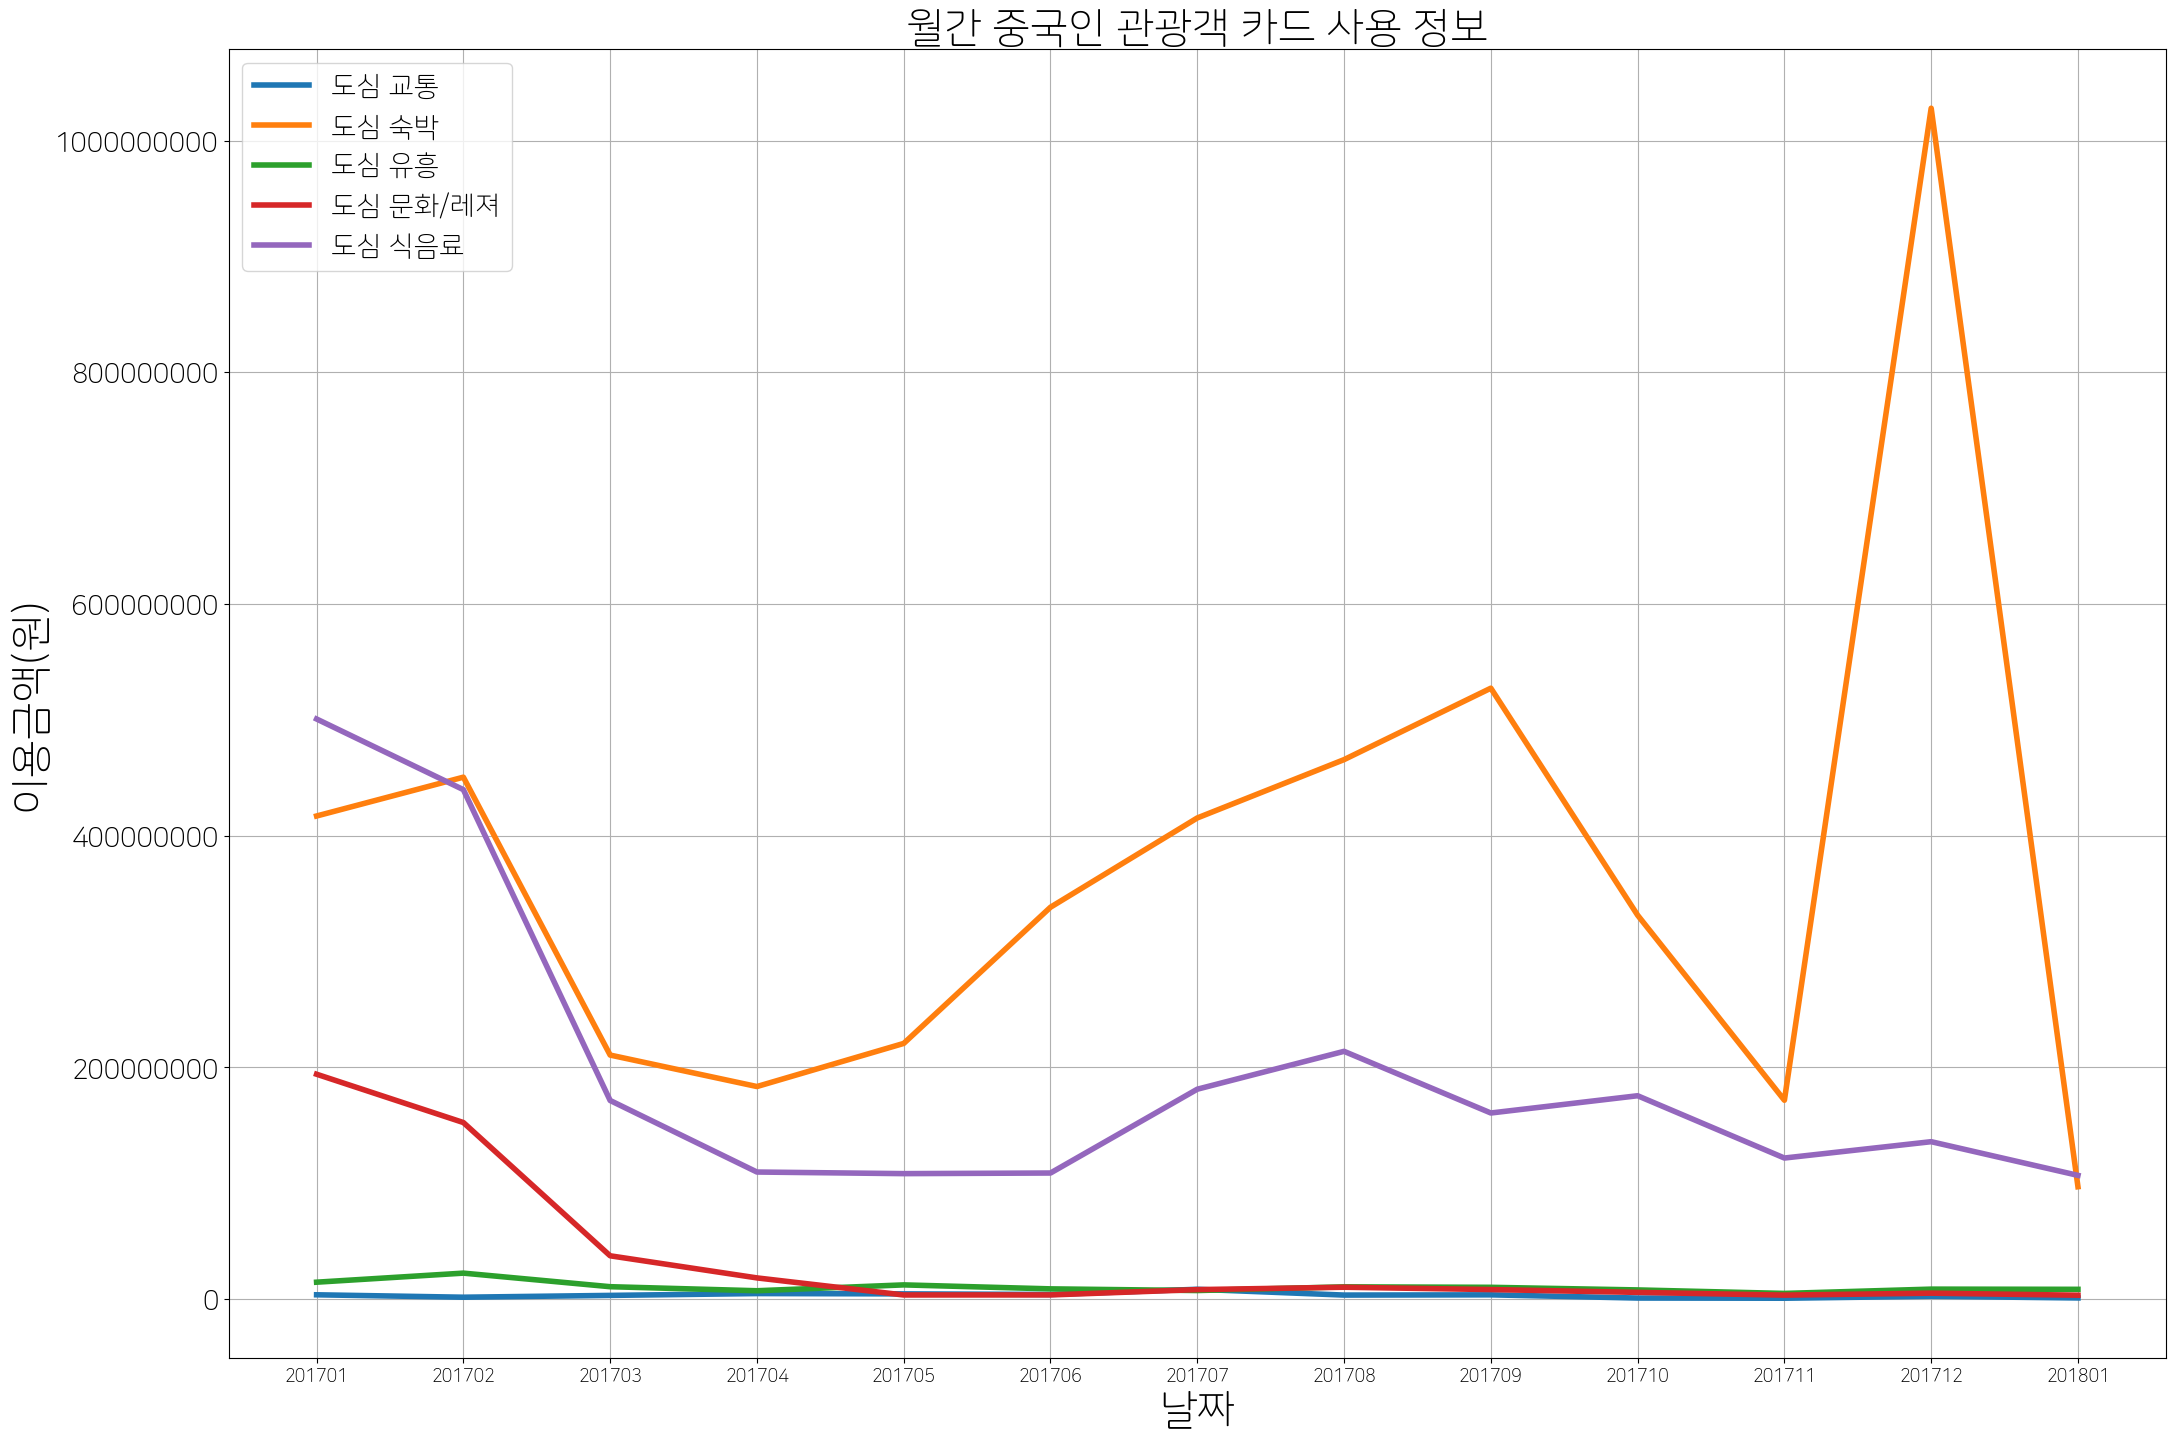

In [250]:
#도심 쇼핑,소매,기타 제거
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(df10["날짜"], df10["이용금액"], linestyle='-', linewidth=4)
plt.plot(df14["날짜"], df14["이용금액"], linestyle='-', linewidth=4)
plt.plot(df15["날짜"], df15["이용금액"], linestyle='-', linewidth=4)
plt.plot(df17["날짜"], df17["이용금액"], linestyle='-', linewidth=4)
plt.plot(df18["날짜"], df18["이용금액"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['도심 교통',
            '도심 숙박','도심 유흥', '도심 문화/레져','도심 식음료'], fontsize=20)
plt.title('월간 중국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

# 내국인

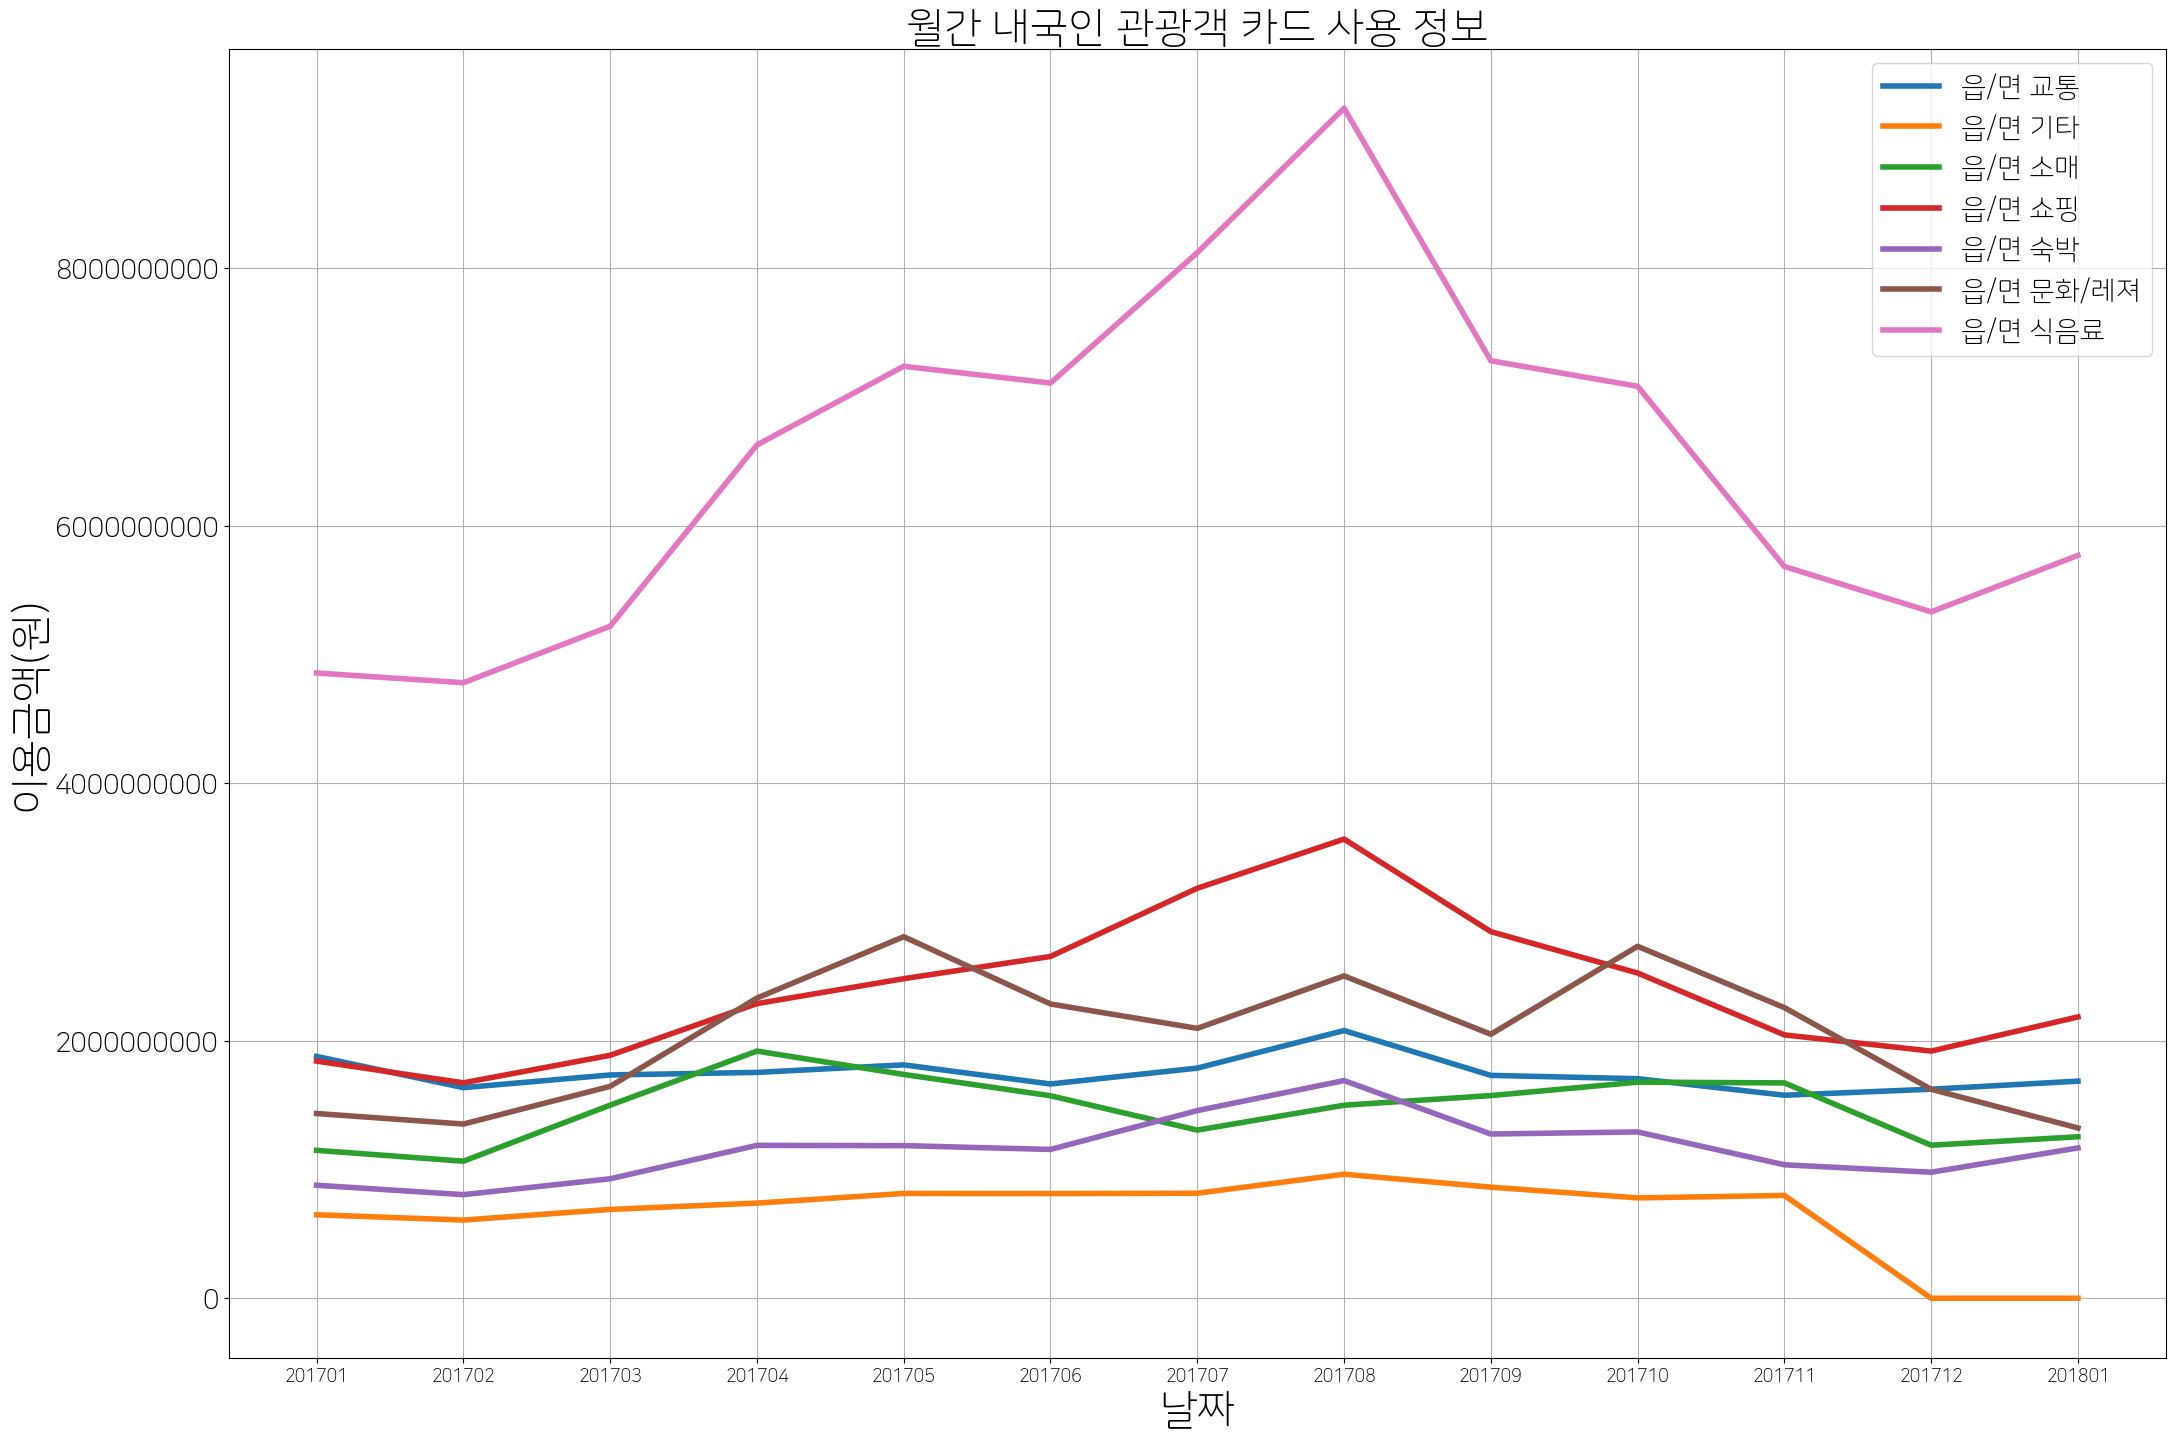

In [251]:
#전체 읍면 단위
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(dfk1["날짜"], dfk1["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk2["날짜"], dfk2["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk3["날짜"], dfk3["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk4["날짜"], dfk4["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk5["날짜"], dfk5["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk8["날짜"], dfk8["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk9["날짜"], dfk9["이용금액"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['읍/면 교통','읍/면 기타','읍/면 소매', '읍/면 쇼핑',
            '읍/면 숙박', '읍/면 문화/레져','읍/면 식음료'], fontsize=20)
plt.title('월간 내국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

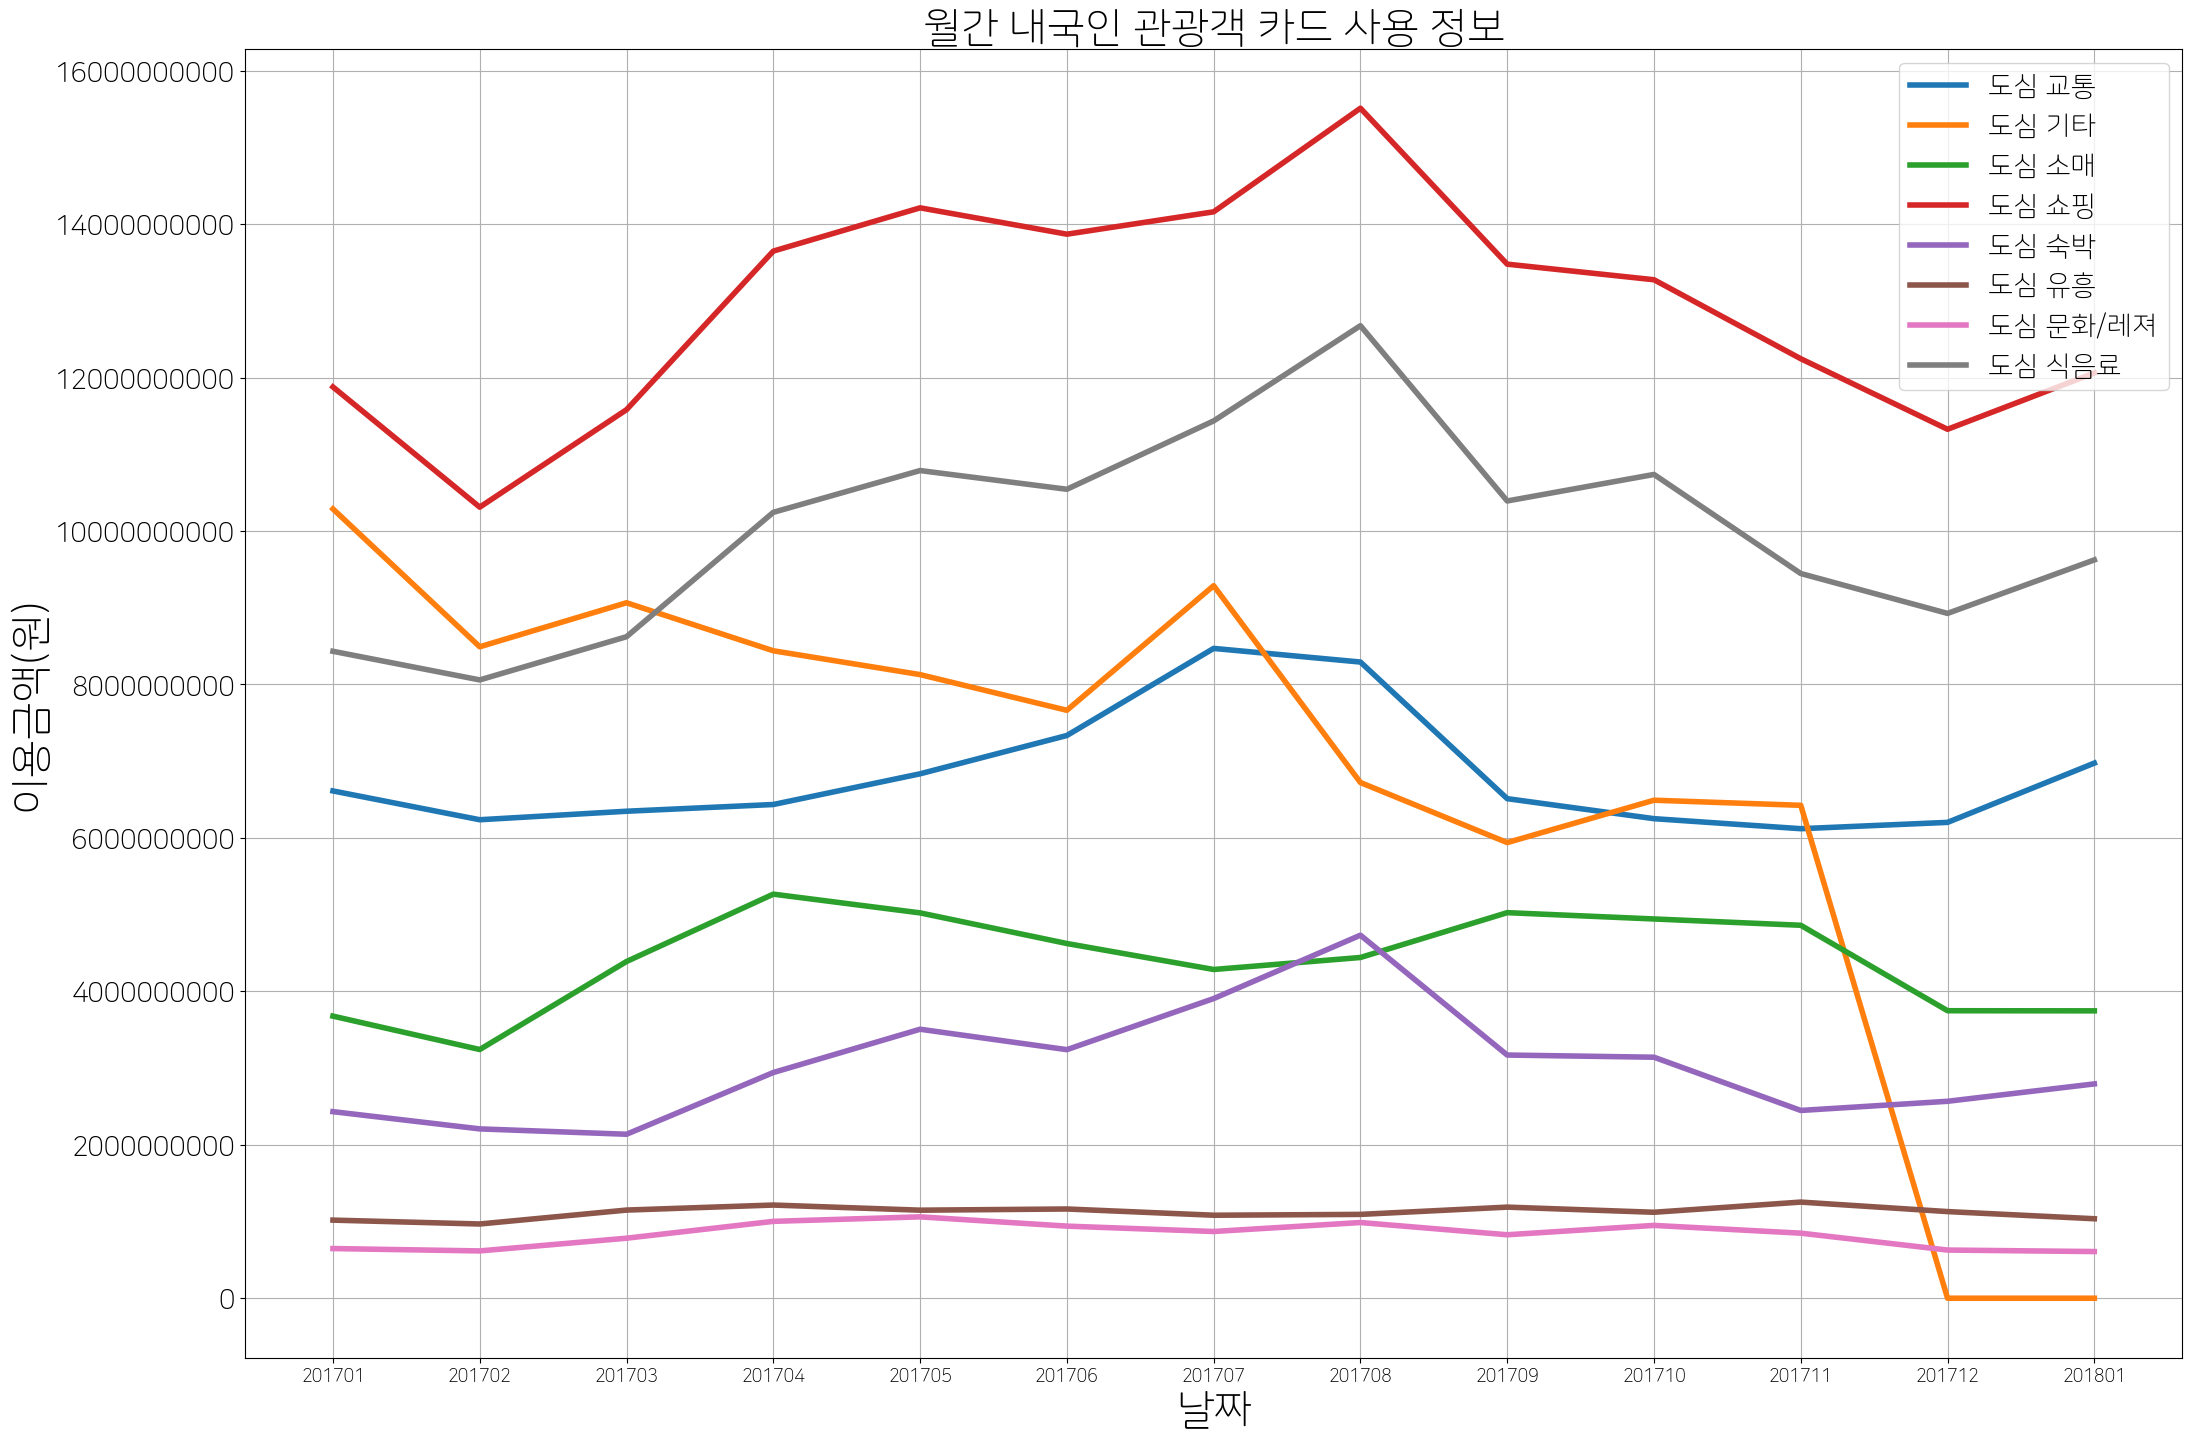

In [252]:
#도심전체
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(dfk10["날짜"], dfk10["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk11["날짜"], dfk11["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk12["날짜"], dfk12["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk13["날짜"], dfk13["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk14["날짜"], dfk14["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk15["날짜"], dfk15["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk17["날짜"], dfk17["이용금액"], linestyle='-', linewidth=4)
plt.plot(dfk18["날짜"], dfk18["이용금액"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['도심 교통','도심 기타','도심 소매', '도심 쇼핑',
            '도심 숙박','도심 유흥', '도심 문화/레져','도심 식음료'], fontsize=20)
plt.title('월간 내국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

# 세부업종

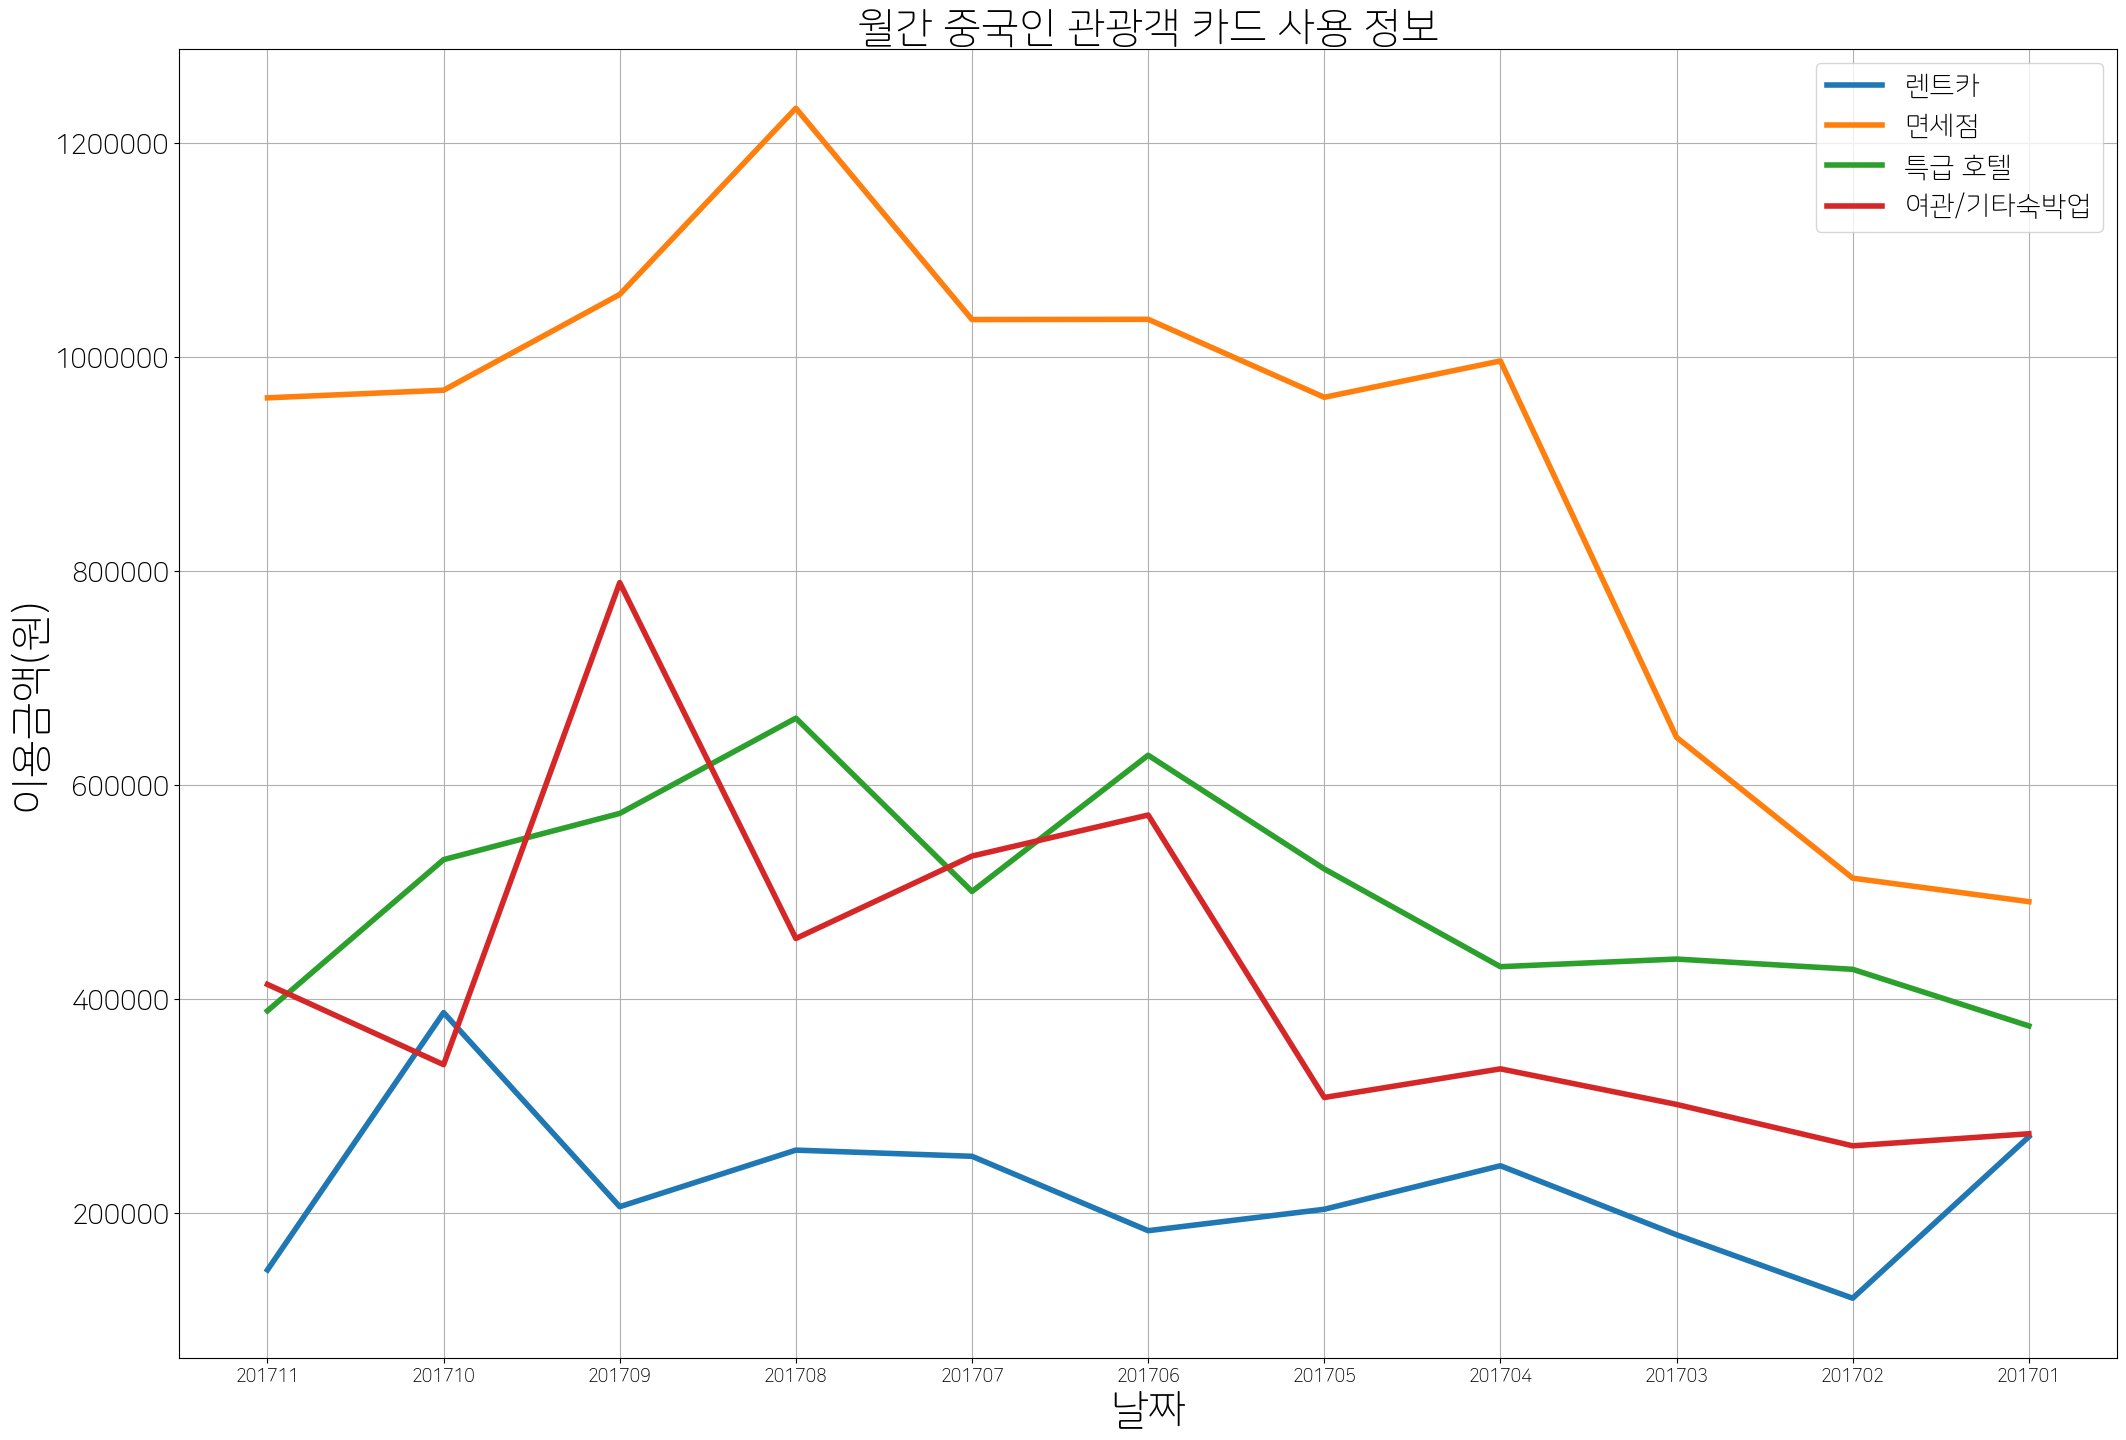

In [254]:
#중국 전체
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(dfcc1["dtYearMonth"], dfcc1["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfcc2["dtYearMonth"], dfcc2["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfcc3["dtYearMonth"], dfcc3["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfcc4["dtYearMonth"], dfcc4["costOfPerson"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['렌트카','면세점','특급 호텔', '여관/기타숙박업'], fontsize=20)
plt.title('월간 중국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

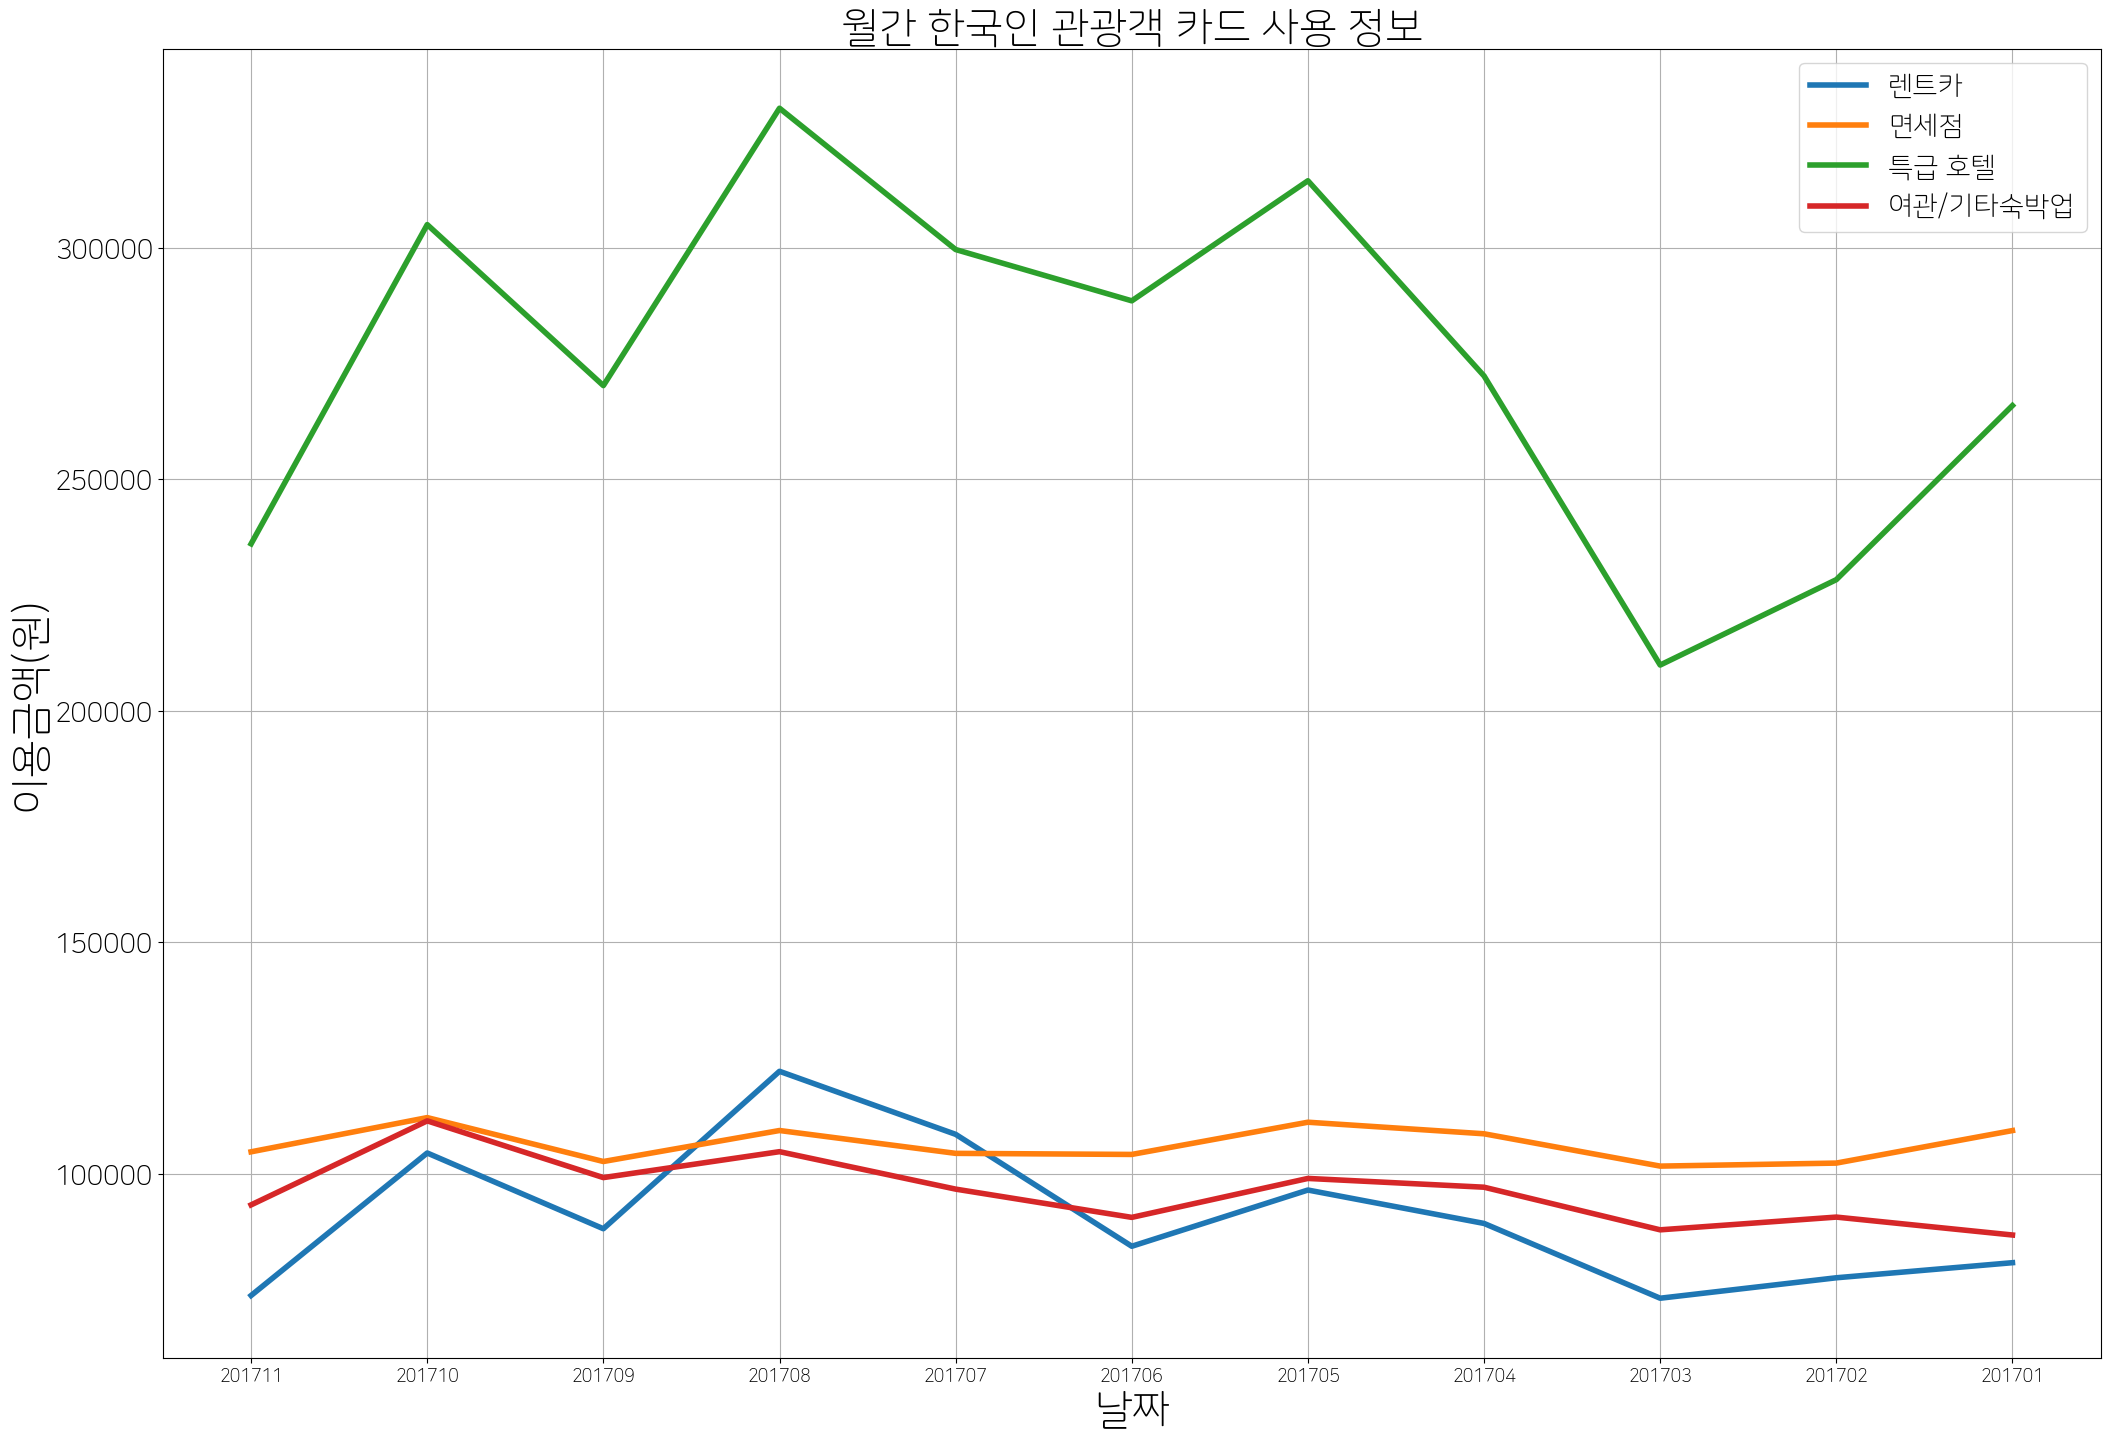

In [256]:
#한국 전체
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(dfkc1["dtYearMonth"], dfkc1["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfkc2["dtYearMonth"], dfkc2["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfkc3["dtYearMonth"], dfkc3["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfkc4["dtYearMonth"], dfkc4["costOfPerson"], linestyle='-', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['렌트카','면세점','특급 호텔', '여관/기타숙박업'], fontsize=20)
plt.title('월간 한국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

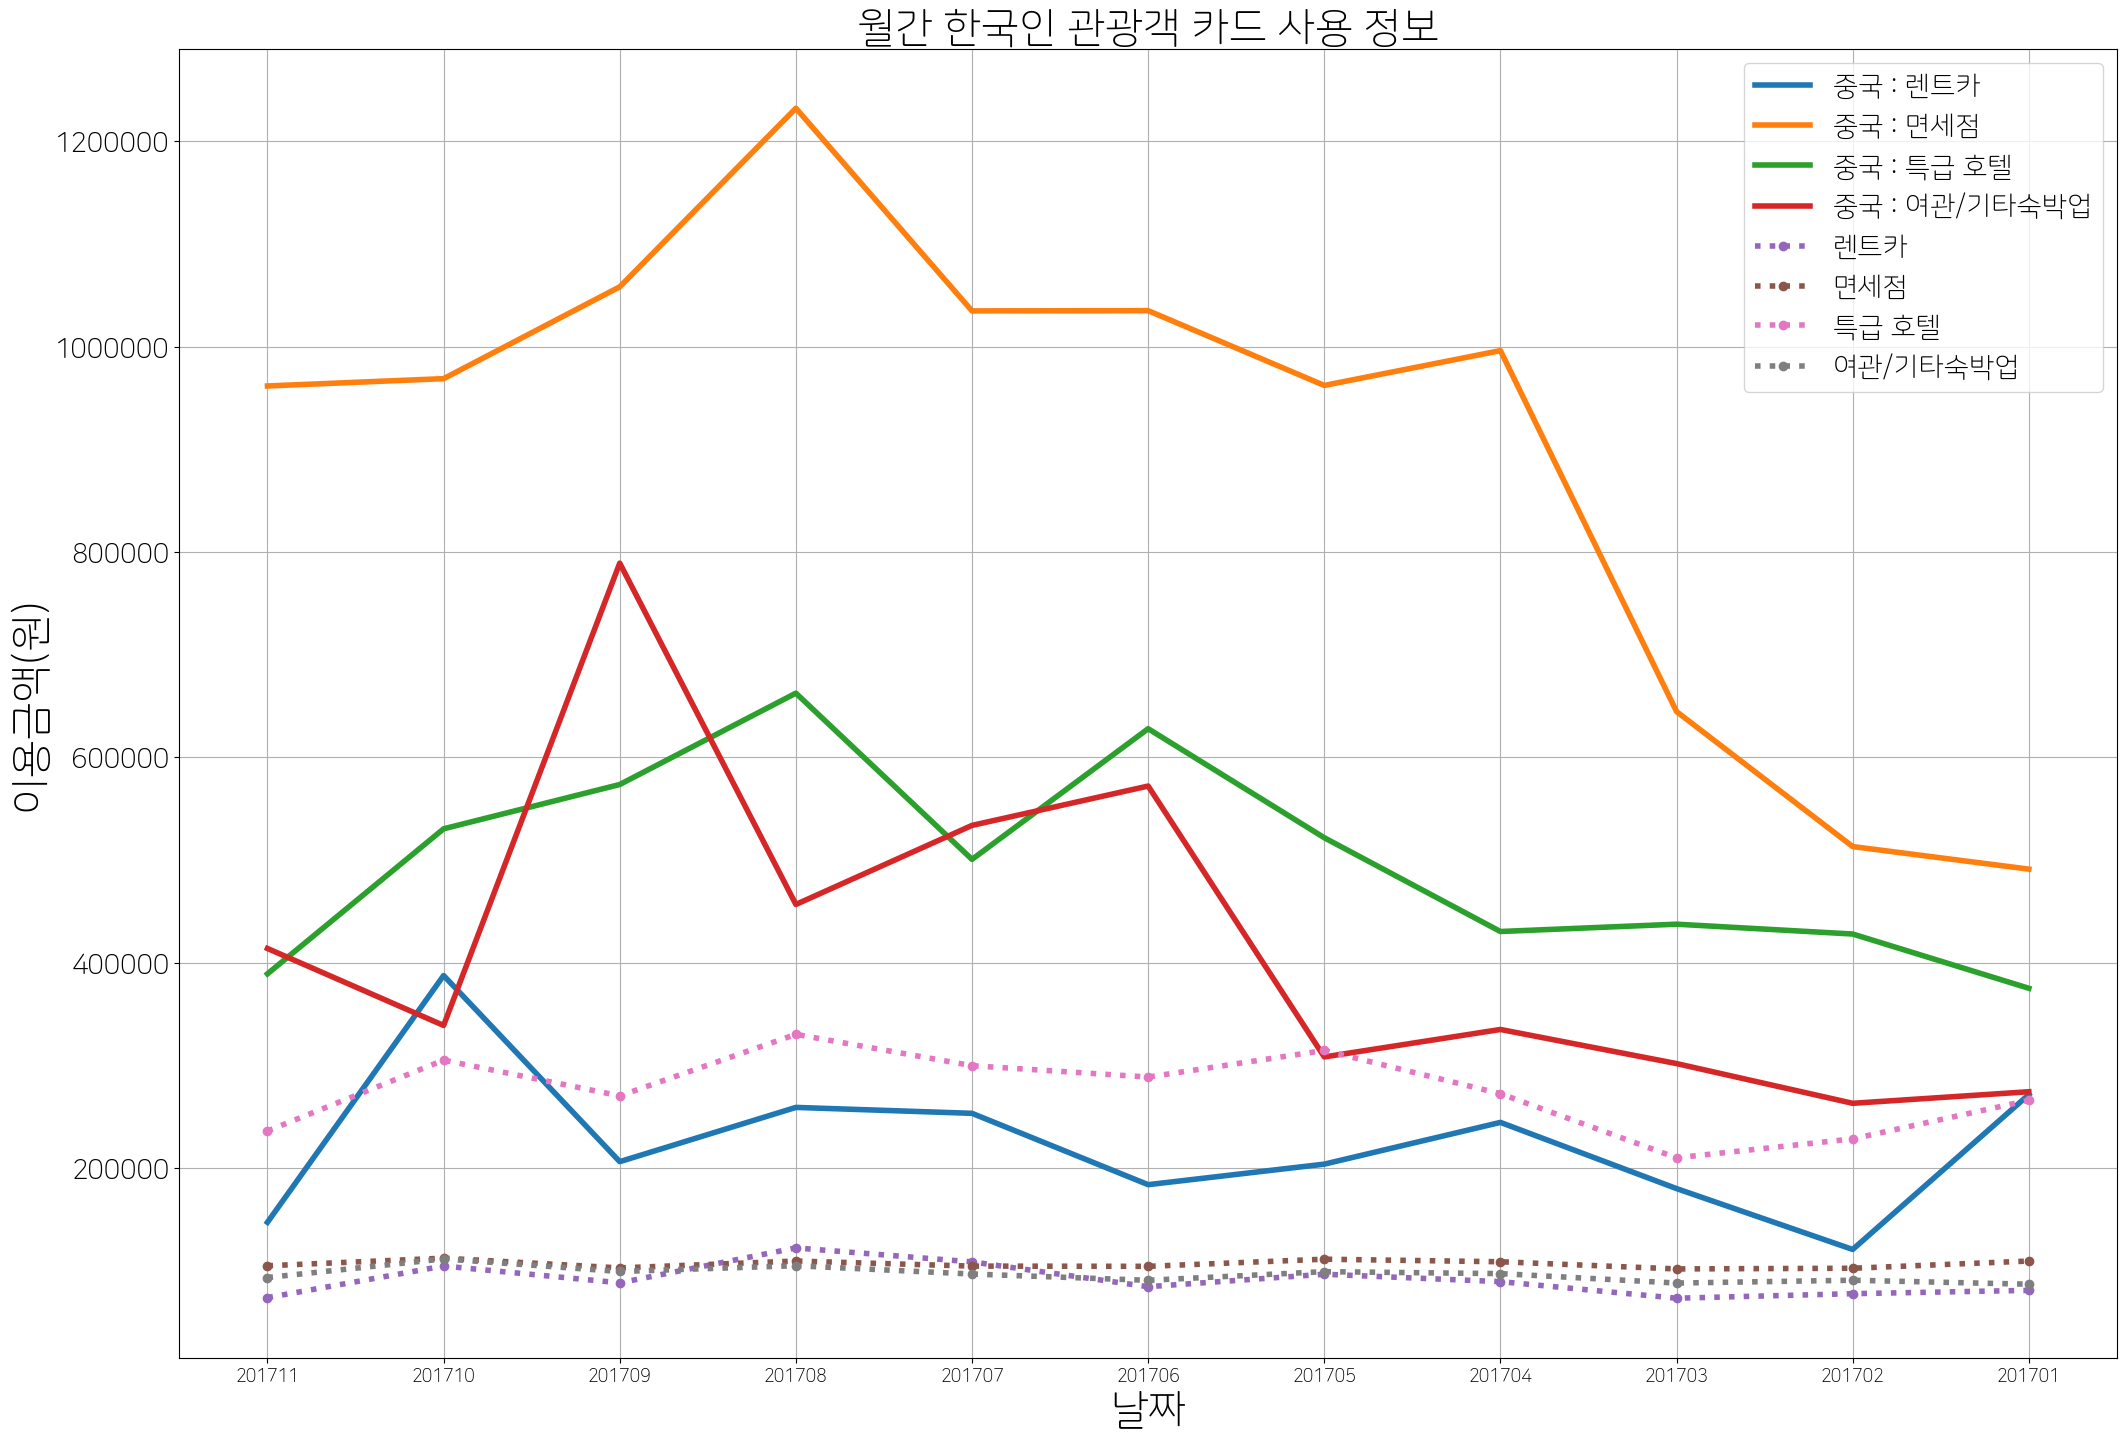

In [259]:
#중국,한국 전체
plt.style.use("default")
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows\Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['figure.figsize'] = [25, 17]

plt.ticklabel_format(style='plain') ##지수


plt.plot(dfcc1["dtYearMonth"], dfcc1["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfcc2["dtYearMonth"], dfcc2["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfcc3["dtYearMonth"], dfcc3["costOfPerson"], linestyle='-', linewidth=4)
plt.plot(dfcc4["dtYearMonth"], dfcc4["costOfPerson"], linestyle='-', linewidth=4)


plt.plot(dfkc1["dtYearMonth"], dfkc1["costOfPerson"], marker='o',linestyle=':', linewidth=4)
plt.plot(dfkc2["dtYearMonth"], dfkc2["costOfPerson"], marker='o',linestyle=':', linewidth=4)
plt.plot(dfkc3["dtYearMonth"], dfkc3["costOfPerson"], marker='o',linestyle=':', linewidth=4)
plt.plot(dfkc4["dtYearMonth"], dfkc4["costOfPerson"], marker='o',linestyle=':', linewidth=4)


plt.xticks(fontsize=13)
plt.yticks(fontsize=20)

plt.legend(['중국 : 렌트카','중국 : 면세점','중국 : 특급 호텔', '중국 : 여관/기타숙박업',
            '렌트카','면세점','특급 호텔', '여관/기타숙박업'], fontsize=20)
plt.title('월간 한국인 관광객 카드 사용 정보', fontsize=30)
plt.xlabel('날짜', fontsize=30)
plt.ylabel('이용금액(원)', fontsize=30)
plt.grid(True)

plt.show()

# 요일,업종별

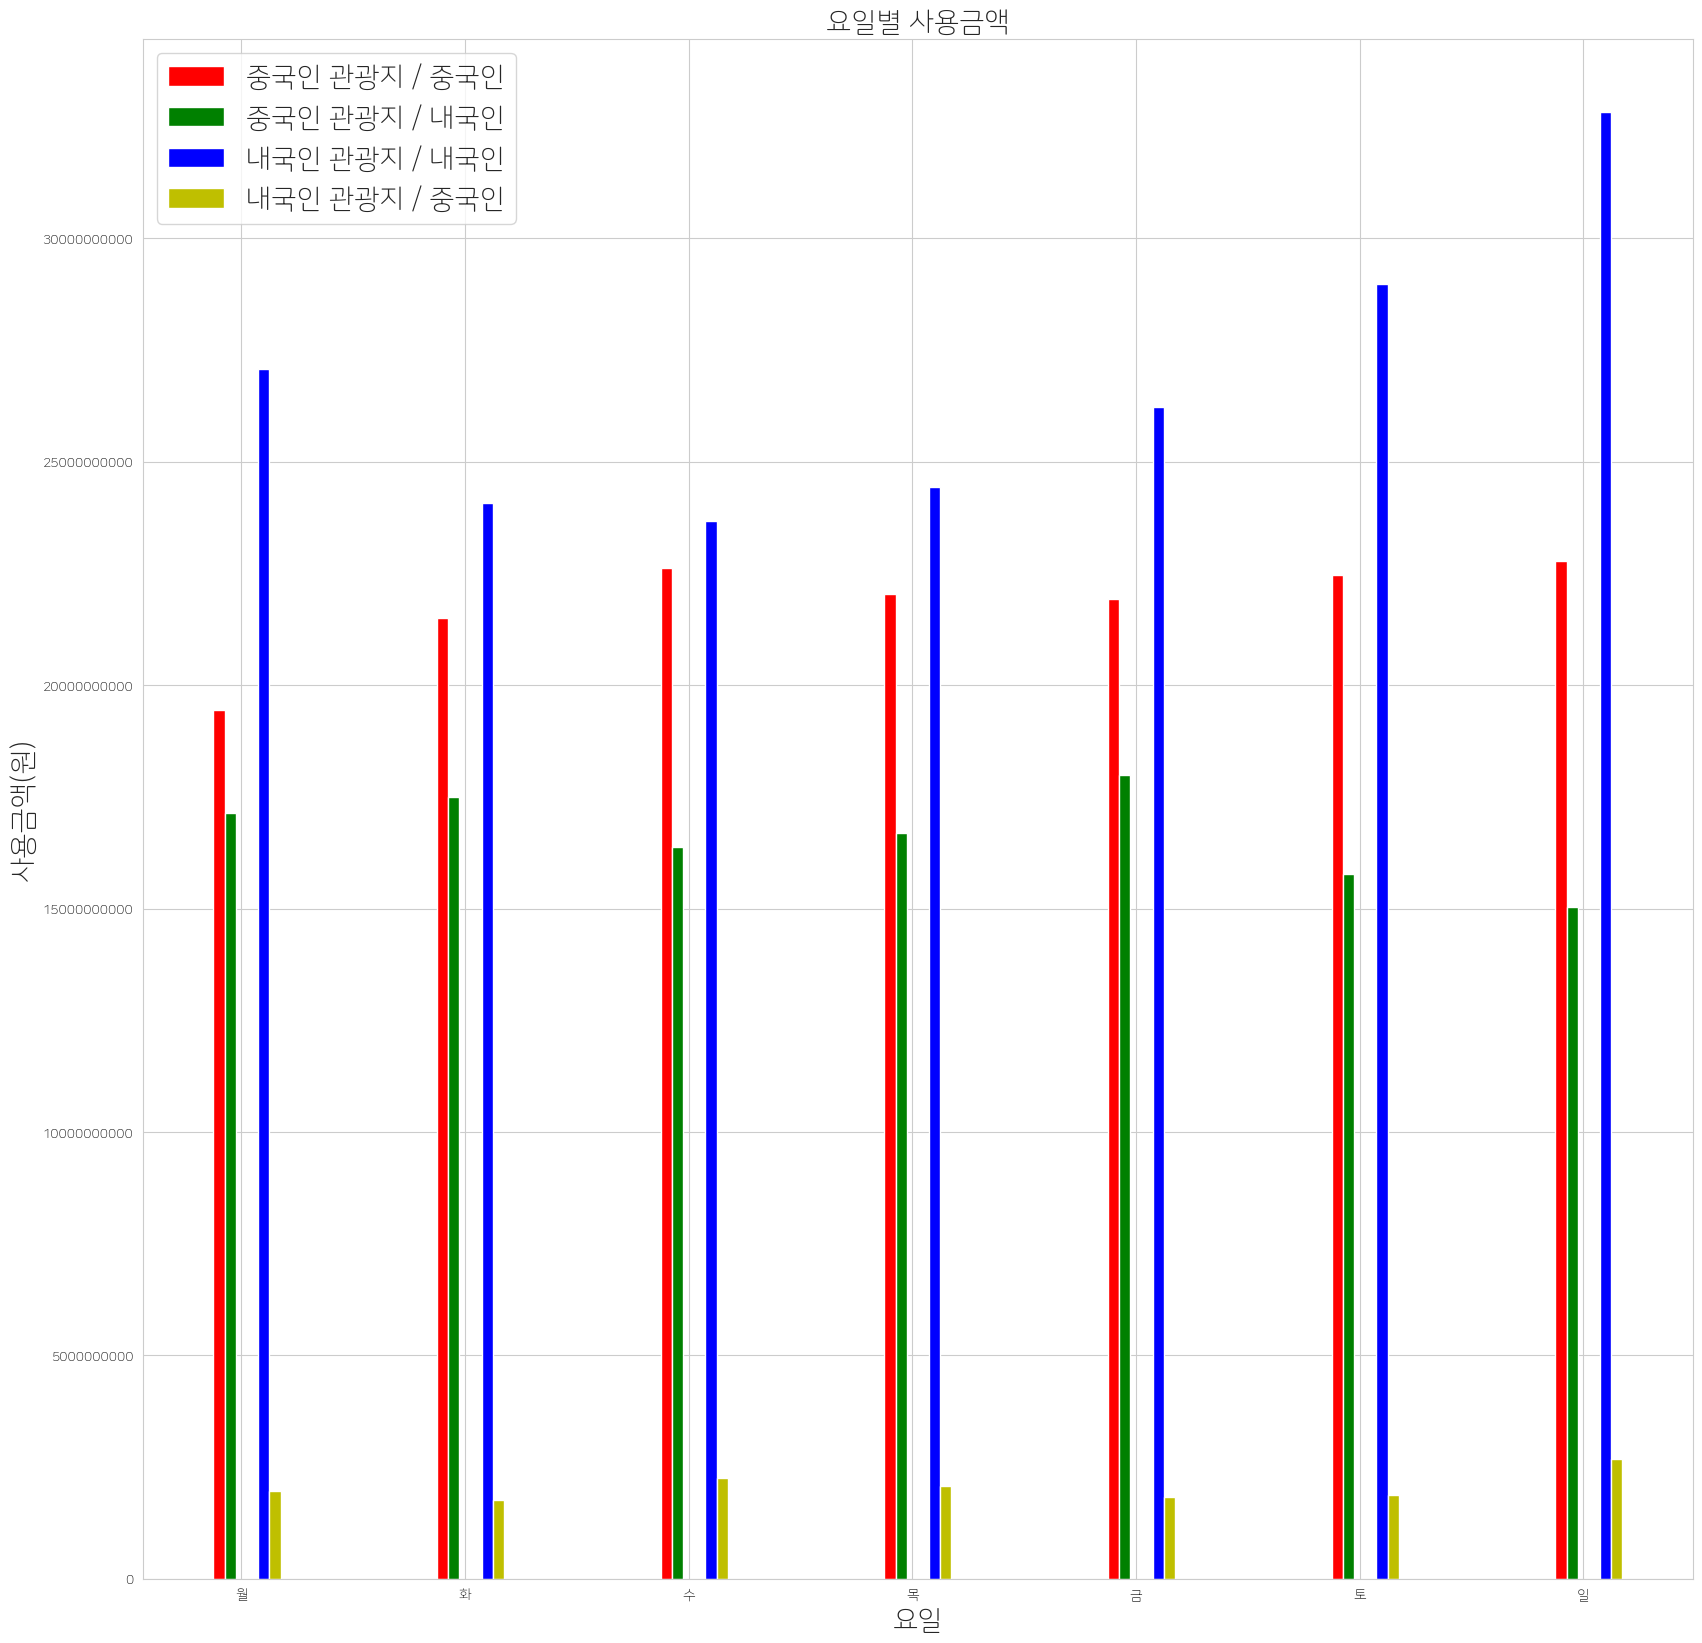

In [342]:
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows/Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False


plt.subplots(figsize=(20,20))
plt.ticklabel_format(style='plain') ##지수

xLabel=['월', '화', '수','목','금','토','일']
x=pd.Series([1,2,3,4,5,6,7])

wn=0.05

m1=[dc1[0],dc1[1],dc1[2],dc1[3],dc1[4],dc1[5],dc1[6]] #1
m2=[dc2[0],dc2[1],dc2[2],dc2[3],dc2[4],dc2[5],dc2[6]] #2
m3=[dc3[0],dc3[1],dc3[2],dc3[3],dc3[4],dc3[5],dc3[6]] #3
m4=[dc4[0],dc4[1],dc4[2],dc4[3],dc4[4],dc4[5],dc4[6]] #4


plt.xticks(x+wn*5, xLabel)

plt.bar(x+wn+0.1,m1,color='r', width=0.05, label="중국인 관광지 / 중국인")
plt.bar(x+wn*2+0.1,m2,color='g', width=0.05, label="중국인 관광지 / 내국인")

plt.bar(x+wn*3+0.2,m3,color='b', width=0.05, label="내국인 관광지 / 내국인")
plt.bar(x+wn*4+0.2,m4,color='y', width=0.05, label="내국인 관광지 / 중국인")




plt.xlabel("요일",fontsize=20)
plt.ylabel("사용금액(원)",fontsize=20)
plt.title("요일별 사용금액",fontsize=20)

plt.legend(fontsize=20)

plt.show()

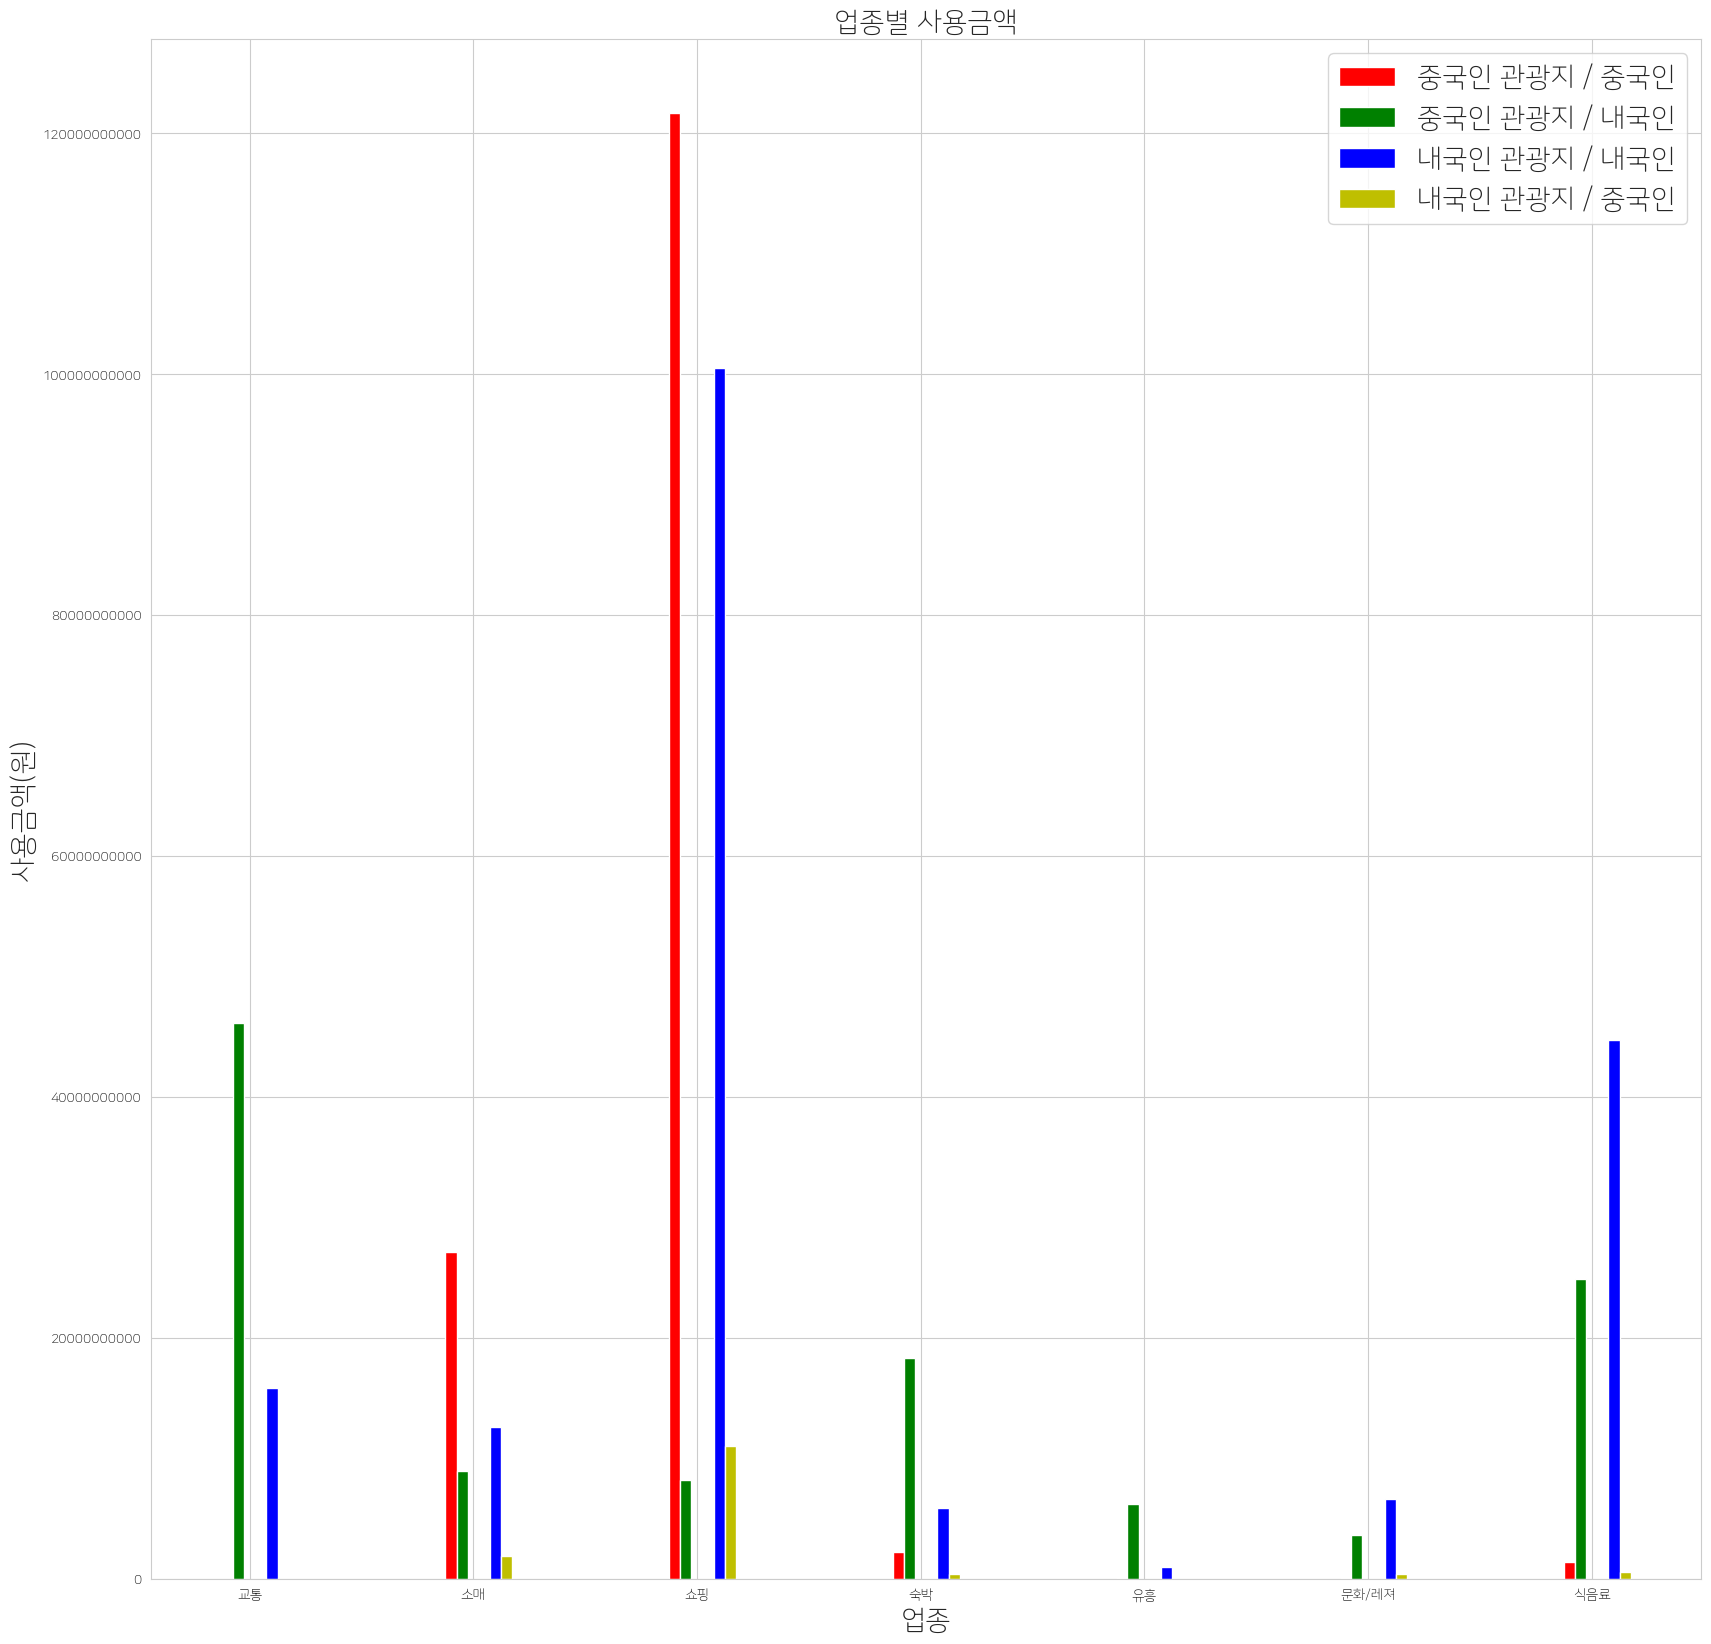

In [360]:
from matplotlib import font_manager, rc
font_path = 'C:/Users/Joo/AppData/Local/Microsoft/Windows/Fonts/NanumSquareRoundB.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False


plt.subplots(figsize=(20,20))
plt.ticklabel_format(style='plain') ##지수

xLabel=['교통', '소매', '쇼핑','숙박','유흥','문화/레져','식음료']
x=pd.Series([1,2,3,4,5,6,7])

wn=0.05

m1=[dd1[0],dd1[1],dd1[2],dd1[3],dd1[4],dd1[5],dd1[6]] #1
m2=[dd2[0],dd2[1],dd2[2],dd2[3],dd2[4],dd2[5],dd2[6]] #2
m3=[dd3[0],dd3[1],dd3[2],dd3[3],dd3[4],dd3[5],dd3[6]] #3
m4=[dd4[0],dd4[1],dd4[2],dd4[3],dd4[4],dd4[5],dd4[6]] #4


plt.xticks(x+wn*5, xLabel)

plt.bar(x+wn+0.1,m1,color='r', width=0.05, label="중국인 관광지 / 중국인")
plt.bar(x+wn*2+0.1,m2,color='g', width=0.05, label="중국인 관광지 / 내국인")

plt.bar(x+wn*3+0.2,m3,color='b', width=0.05, label="내국인 관광지 / 내국인")
plt.bar(x+wn*4+0.2,m4,color='y', width=0.05, label="내국인 관광지 / 중국인")




plt.xlabel("업종",fontsize=20)
plt.ylabel("사용금액(원)",fontsize=20)
plt.title("업종별 사용금액",fontsize=20)

plt.legend(fontsize=20)

plt.show()